1. **Importing Packages**

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from scipy.stats import skew, norm, boxcox
from scipy.special import boxcox1p
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split, ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn_pandas import CategoricalImputer
from sklearn.metrics import mean_squared_error, mean_squared_log_error
##Models
from sklearn.linear_model import ElasticNet, LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

2. **Loading Data**

In [3]:
train_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

train_id = train_data['Id']
test_id = test_data['Id']

train_data.drop(['Id'],1,inplace=True)
test_data.drop(['Id'],1,inplace=True)

print(train_data.shape)
print(test_data.shape)

(1460, 80)
(1459, 79)


In [4]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,CBlock,TA,TA,No,Rec,468.00,LwQ,144.00,270.00,882.00,GasA,TA,Y,SBrkr,896,0,0,896,0.00,0.00,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.00,Unf,1.00,730.00,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.00,TA,TA,CBlock,TA,TA,No,ALQ,923.00,Unf,0.00,406.00,1329.00,GasA,TA,Y,SBrkr,1329,0,0,1329,0.00,0.00,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.00,Unf,1.00,312.00,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,PConc,Gd,TA,No,GLQ,791.00,Unf,0.00,137.00,928.00,GasA,Gd,Y,SBrkr,928,701,0,1629,0.00,0.00,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.00,Fin,2.00,482.00,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.00,TA,TA,PConc,TA,TA,No,GLQ,602.00,Unf,0.00,324.00,926.00,GasA,Ex,Y,SBrkr,926,678,0,1604,0.00,0.00,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.00,Fin,2.00,470.00,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.00,Gd,TA,PConc,Gd,TA,No,ALQ,263.00,Unf,0.00,1017.00,1280.00,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.00,0.00,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.00,RFn,2.00,506.00,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


3. **Checking for outliers**

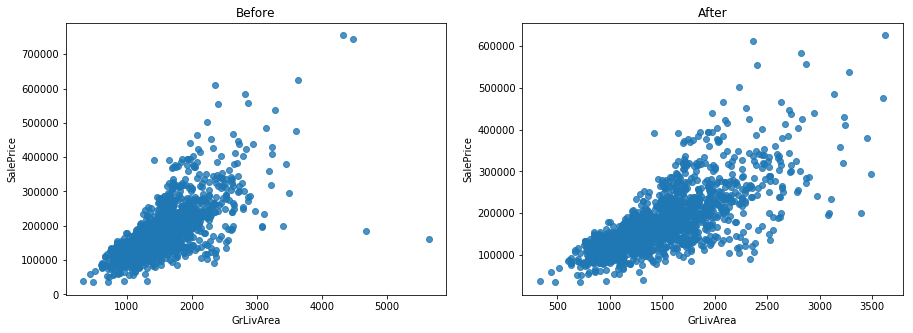

In [6]:
##Checking for outliers in GrLivArea
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
g = sns.regplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], fit_reg=False).set_title("Before")

# Delete outliers
plt.subplot(1, 2, 2)                                                                                
train_data = train_data[train_data['GrLivArea']<4000]
train_data.reset_index(inplace=True)
train_data.drop(['index'],1,inplace=True)

g = sns.regplot(x=train_data['GrLivArea'], y=train_data['SalePrice'], fit_reg=False).set_title("After")

4. Separating Predictor and target

In [7]:
target = train_data['SalePrice']
train_data.drop(['SalePrice'],1,inplace=True)

In [8]:
##combining train and test
ntrain = train_data.shape[0]
ntest = test_data.shape[0]

all_data = train_data.append(test_data, ignore_index=True)
all_data.shape

(2915, 79)

5. **Checking for missing values**

In [9]:
#checking for null values
all_data.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2717
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

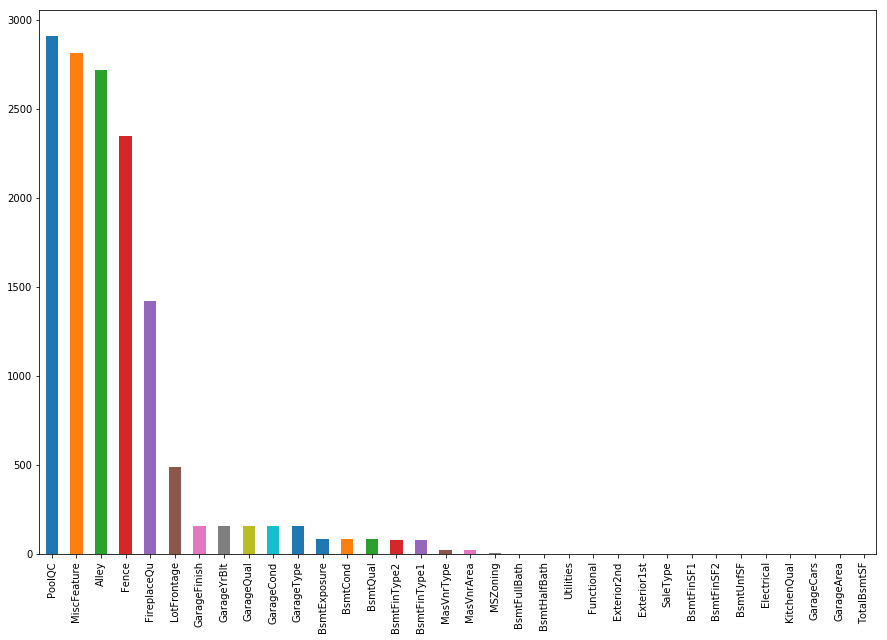

In [10]:
# aggregate all null values 
all_data_na = all_data.isnull().sum()

# get rid of all the values with 0 missing values
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
plt.subplots(figsize =(15, 10))
all_data_na.plot(kind='bar');

6. Handling missing values as per the data description

> i) Filling missing values for few  features as 'None'

In [11]:
## As per the Data description, filling missing values with 'None'
cols = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu",
           "GarageType", "GarageFinish", "GarageQual", "GarageCond",
           "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
            "BsmtFinType2", "MSSubClass", "MasVnrType"]
for i in cols:
    all_data[i] = all_data[i].fillna("None")

> ii) Area of LotFront will be similar to it's neighbourhood, So let's fill missing values in LotFront with median values of the houses in the neighbourhood

In [12]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

> iii) Filling missing values for few features with 0. 

In [13]:
## As per the Data description, filling missing values as 0
cols = ["GarageYrBlt", "GarageArea", "GarageCars", "BsmtFinSF1", 
           "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea",
           "BsmtFullBath", "BsmtHalfBath"]
for i in cols:
    all_data[i] = all_data[i].fillna(0)

> iv) Filling columns with small amount of missing values with Imputer 

In [14]:
## Columns with major missing values are handled. Let's fill columns having small amount of missing values with mode.
cols = ['Electrical','KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType','Functional','MSZoning']
imputer = CategoricalImputer()
for i in cols:
    all_data[i] = imputer.fit_transform(all_data[i])

> v) There is simply no variation to be analyzed for Utilities; a varaible that does not vary is not a variable but a constant

In [15]:
##Feature Utilities has only one value for test data. 
print('Utilities values in train data:')
print(train_data['Utilities'].value_counts())
print()
print('Utilities values in test data:')
print(test_data['Utilities'].value_counts())

Utilities values in train data:
AllPub    1455
NoSeWa       1
Name: Utilities, dtype: int64

Utilities values in test data:
AllPub    1457
Name: Utilities, dtype: int64


In [16]:
all_data.drop(['Utilities'],1,inplace=True)

In [17]:
## Checking whether any missing value left.
all_data.isnull().any().sum()

0

7) Exploratory Data Analysis

> i) Checking correlation between numerical columns and selecting top 10 for feature engineering

In [18]:
train = train_data.copy()
train['SalePrice'] = target
corr = train.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.00,-0.41,-0.14,0.03,-0.06,0.03,0.04,0.02,-0.08,-0.07,-0.14,-0.26,-0.27,0.31,0.05,0.08,0.00,-0.00,0.13,0.18,-0.02,0.28,0.04,-0.05,0.08,-0.04,-0.10,-0.01,-0.01,-0.01,-0.04,-0.03,0.01,-0.01,-0.01,-0.02,-0.09
LotFrontage,-0.41,1.00,0.39,0.23,-0.06,0.11,0.08,0.16,0.13,0.06,0.14,0.31,0.40,0.05,0.04,0.34,0.07,-0.01,0.19,0.04,0.27,-0.00,0.33,0.24,0.06,0.29,0.32,0.08,0.12,0.02,0.08,0.05,0.08,0.01,0.03,0.01,0.36
LotArea,-0.14,0.39,1.00,0.09,-0.00,0.01,0.01,0.08,0.17,0.11,-0.00,0.22,0.27,0.04,0.01,0.23,0.15,0.05,0.12,0.01,0.12,-0.02,0.17,0.26,-0.03,0.15,0.16,0.17,0.06,-0.02,0.02,0.05,0.03,0.04,0.01,-0.01,0.27
OverallQual,0.03,0.23,0.09,1.00,-0.09,0.57,0.55,0.40,0.21,-0.06,0.31,0.53,0.46,0.28,-0.03,0.58,0.10,-0.05,0.54,0.27,0.10,-0.18,0.42,0.39,0.55,0.60,0.55,0.23,0.30,-0.11,0.03,0.07,0.02,-0.03,0.08,-0.02,0.80
OverallCond,-0.06,-0.06,-0.00,-0.09,1.00,-0.38,0.07,-0.13,-0.04,0.04,-0.14,-0.18,-0.15,0.03,0.03,-0.08,-0.05,0.12,-0.19,-0.06,0.01,-0.09,-0.06,-0.02,-0.32,-0.19,-0.15,-0.00,-0.03,0.07,0.03,0.05,0.01,0.07,-0.00,0.04,-0.08
YearBuilt,0.03,0.11,0.01,0.57,-0.38,1.00,0.59,0.31,0.25,-0.05,0.15,0.40,0.28,0.00,-0.18,0.19,0.19,-0.04,0.47,0.24,-0.07,-0.17,0.09,0.14,0.83,0.54,0.48,0.22,0.18,-0.39,0.03,-0.05,-0.01,-0.03,0.01,-0.01,0.54
YearRemodAdd,0.04,0.08,0.01,0.55,0.07,0.59,1.00,0.18,0.12,-0.07,0.18,0.29,0.24,0.14,-0.06,0.29,0.12,-0.01,0.44,0.18,-0.04,-0.15,0.19,0.11,0.64,0.42,0.37,0.20,0.22,-0.19,0.05,-0.04,-0.01,-0.01,0.02,0.04,0.52
MasVnrArea,0.02,0.16,0.08,0.40,-0.13,0.31,0.18,1.00,0.24,-0.07,0.11,0.34,0.32,0.16,-0.07,0.36,0.08,0.01,0.27,0.20,0.10,-0.04,0.27,0.24,0.25,0.36,0.36,0.15,0.11,-0.11,0.02,0.07,-0.02,-0.03,0.00,-0.00,0.48
BsmtFinSF1,-0.08,0.13,0.17,0.21,-0.04,0.25,0.12,0.24,1.00,-0.05,-0.53,0.46,0.39,-0.18,-0.07,0.12,0.66,0.07,0.04,-0.01,-0.12,-0.08,0.00,0.24,0.15,0.22,0.27,0.20,0.07,-0.10,0.03,0.07,0.02,0.01,-0.00,0.02,0.40
BsmtFinSF2,-0.07,0.06,0.11,-0.06,0.04,-0.05,-0.07,-0.07,-0.05,1.00,-0.21,0.12,0.11,-0.10,0.01,-0.00,0.16,0.07,-0.08,-0.03,-0.02,-0.04,-0.03,0.05,-0.09,-0.04,-0.02,0.07,0.01,0.04,-0.03,0.09,0.05,0.00,-0.02,0.03,-0.01


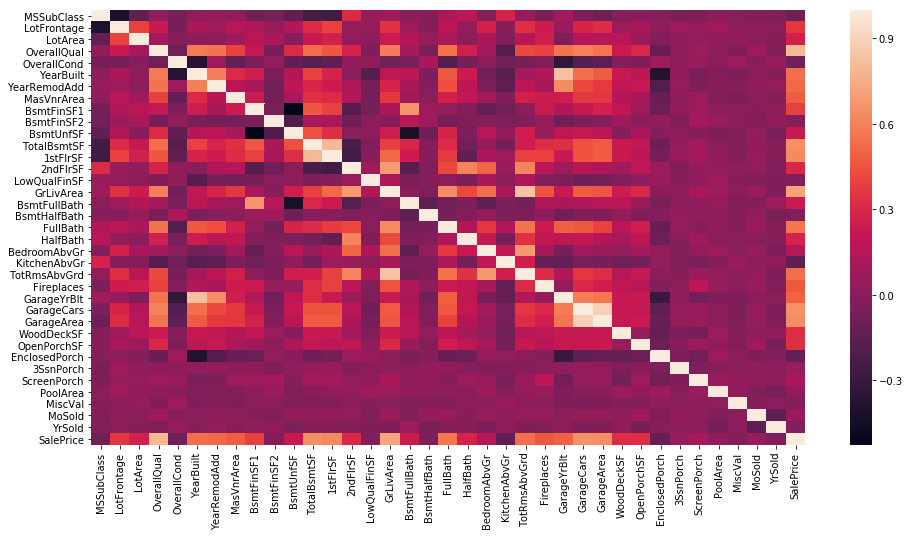

In [19]:
plt.figure(figsize= (16,8))
sns.heatmap(corr)

> Selecting features have correlation of 0.4 and above with target variable

In [20]:
corr_features = list(corr[abs(corr['SalePrice'])>=0.4].index)
corr_features

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

> ii) It is not necessary to have linear relationship with target variable and so we are adding polynomial features upto cubic and also reciprocol for the effect where dependent variable decreases as the independent variable increases

In [21]:
# Quadratic
all_data["OverallQual-2"] = all_data["OverallQual"] ** 2
all_data["GrLivArea-2"] = all_data["GrLivArea"] ** 2
all_data["GarageCars-2"] = all_data["GarageCars"] ** 2
all_data["GarageArea-2"] = all_data["GarageArea"] ** 2
all_data["TotalBsmtSF-2"] = all_data["TotalBsmtSF"] ** 2
all_data["1stFlrSF-2"] = all_data["1stFlrSF"] ** 2
all_data["FullBath-2"] = all_data["FullBath"] ** 2
all_data["TotRmsAbvGrd-2"] = all_data["TotRmsAbvGrd"] ** 2
all_data["Fireplaces-2"] = all_data["Fireplaces"] ** 2
all_data["MasVnrArea-2"] = all_data["MasVnrArea"] ** 2

# Cubic
all_data["OverallQual-3"] = all_data["OverallQual"] ** 3
all_data["GrLivArea-3"] = all_data["GrLivArea"] ** 3
all_data["GarageCars-3"] = all_data["GarageCars"] ** 3
all_data["GarageArea-3"] = all_data["GarageArea"] ** 3
all_data["TotalBsmtSF-3"] = all_data["TotalBsmtSF"] ** 3
all_data["1stFlrSF-3"] = all_data["1stFlrSF"] ** 3
all_data["FullBath-3"] = all_data["FullBath"] ** 3
all_data["TotRmsAbvGrd-3"] = all_data["TotRmsAbvGrd"] ** 3
all_data["Fireplaces-3"] = all_data["Fireplaces"] ** 3
all_data["MasVnrArea-3"] = all_data["MasVnrArea"] ** 3



# Square Root
all_data["OverallQual-Sq"] = np.sqrt(all_data["OverallQual"])
all_data["GrLivArea-Sq"] = np.sqrt(all_data["GrLivArea"])
all_data["GarageCars-Sq"] = np.sqrt(all_data["GarageCars"])
all_data["GarageArea-Sq"] = np.sqrt(all_data["GarageArea"])
all_data["TotalBsmtSF-Sq"] = np.sqrt(all_data["TotalBsmtSF"])
all_data["1stFlrSF-Sq"] = np.sqrt(all_data["1stFlrSF"])
all_data["FullBath-Sq"] = np.sqrt(all_data["FullBath"])
all_data["TotRmsAbvGrd-Sq"] = np.sqrt(all_data["TotRmsAbvGrd"])
all_data["Fireplaces-Sq"] = np.sqrt(all_data["Fireplaces"])
all_data["MasVnrArea-Sq"] = np.sqrt(all_data["MasVnrArea"])

> iii) 
>> Bivariate Analysis for categorical columns

>> Encoding based on variation of each independent variable with dependent variable

>> Clustering values in few features

MSZoning
AxesSubplot(0.125,0.125;0.775x0.755)


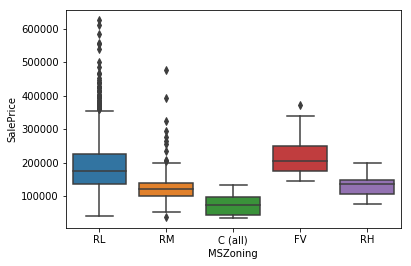

Street
AxesSubplot(0.125,0.125;0.775x0.755)


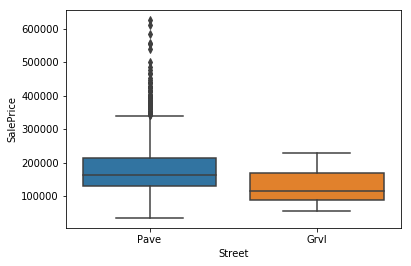

Alley
AxesSubplot(0.125,0.125;0.775x0.755)


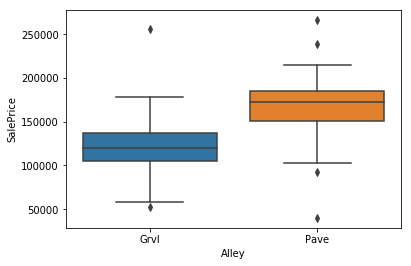

LotShape
AxesSubplot(0.125,0.125;0.775x0.755)


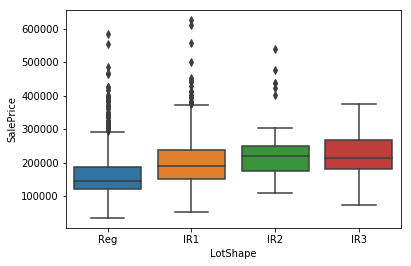

LandContour
AxesSubplot(0.125,0.125;0.775x0.755)


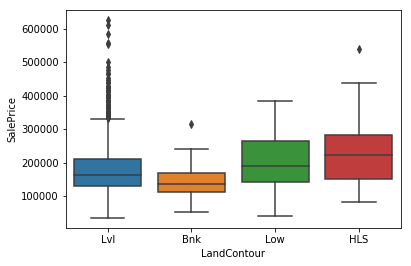

Utilities
AxesSubplot(0.125,0.125;0.775x0.755)


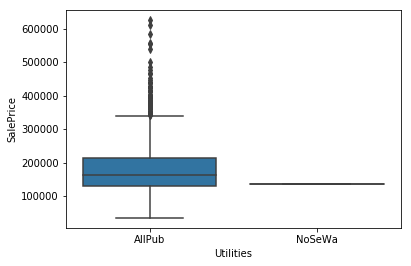

LotConfig
AxesSubplot(0.125,0.125;0.775x0.755)


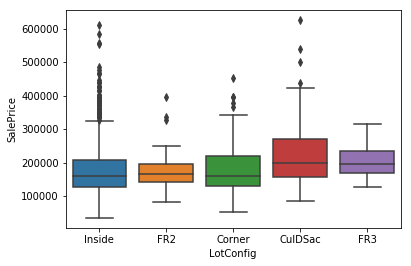

LandSlope
AxesSubplot(0.125,0.125;0.775x0.755)


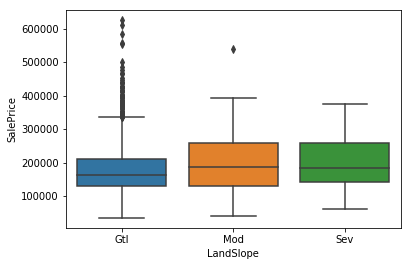

Neighborhood
AxesSubplot(0.125,0.125;0.775x0.755)


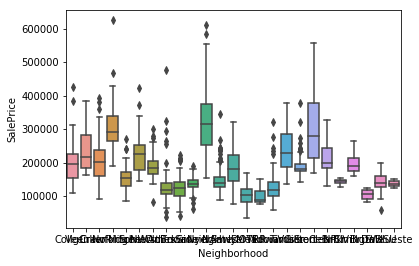

Condition1
AxesSubplot(0.125,0.125;0.775x0.755)


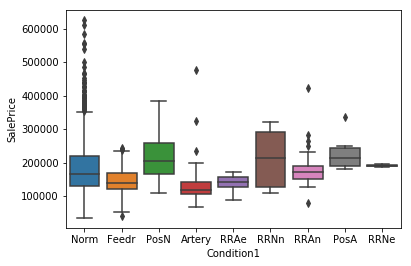

Condition2
AxesSubplot(0.125,0.125;0.775x0.755)


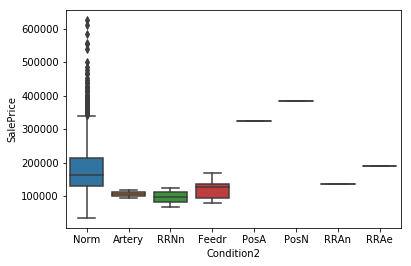

BldgType
AxesSubplot(0.125,0.125;0.775x0.755)


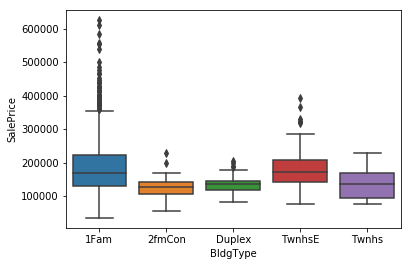

HouseStyle
AxesSubplot(0.125,0.125;0.775x0.755)


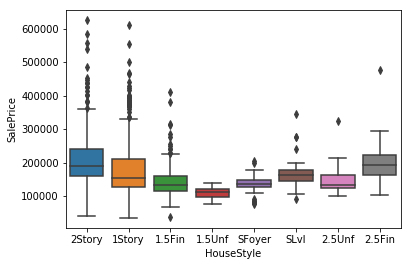

RoofStyle
AxesSubplot(0.125,0.125;0.775x0.755)


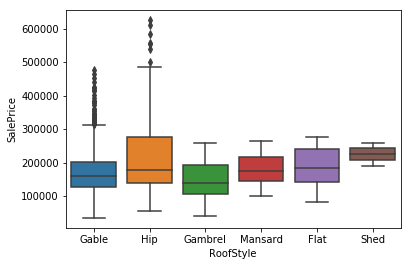

RoofMatl
AxesSubplot(0.125,0.125;0.775x0.755)


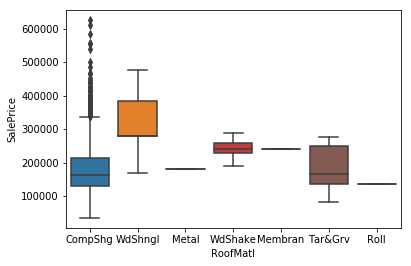

Exterior1st
AxesSubplot(0.125,0.125;0.775x0.755)


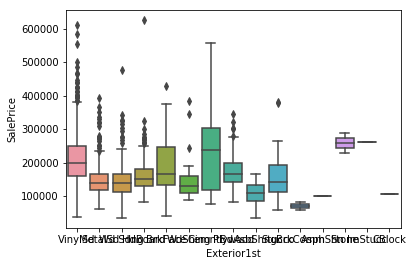

Exterior2nd
AxesSubplot(0.125,0.125;0.775x0.755)


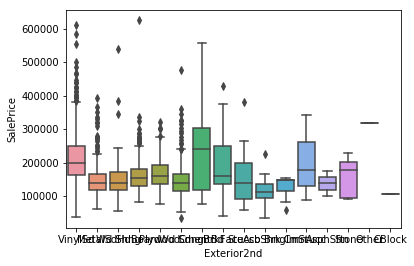

MasVnrType
AxesSubplot(0.125,0.125;0.775x0.755)


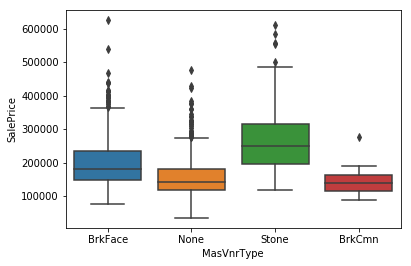

ExterQual
AxesSubplot(0.125,0.125;0.775x0.755)


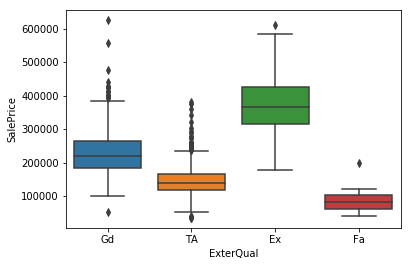

ExterCond
AxesSubplot(0.125,0.125;0.775x0.755)


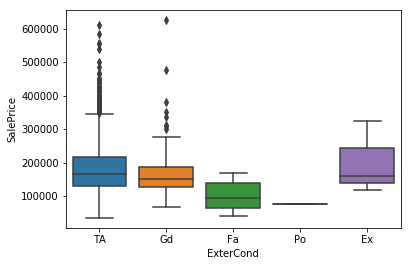

Foundation
AxesSubplot(0.125,0.125;0.775x0.755)


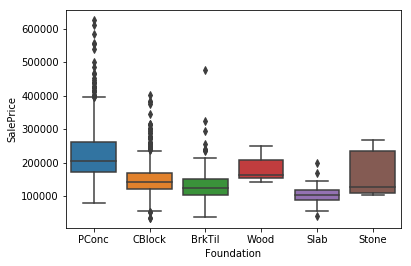

BsmtQual
AxesSubplot(0.125,0.125;0.775x0.755)


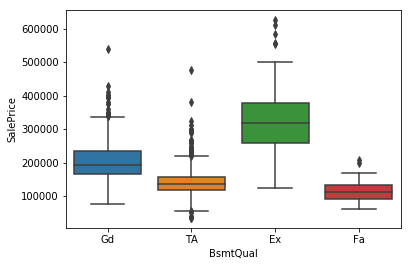

BsmtCond
AxesSubplot(0.125,0.125;0.775x0.755)


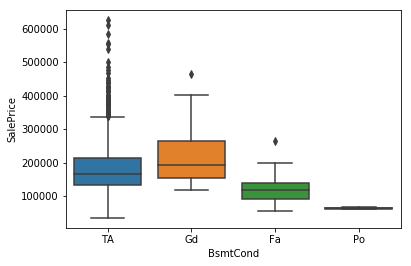

BsmtExposure
AxesSubplot(0.125,0.125;0.775x0.755)


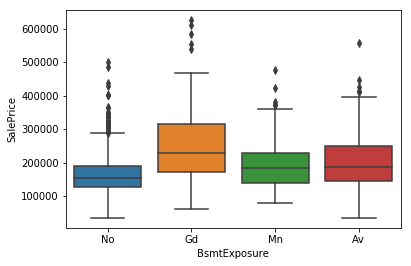

BsmtFinType1
AxesSubplot(0.125,0.125;0.775x0.755)


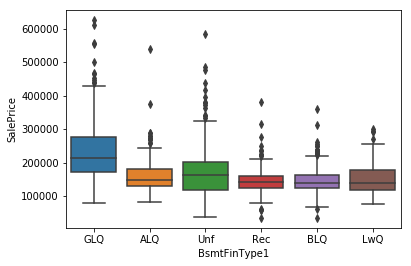

BsmtFinType2
AxesSubplot(0.125,0.125;0.775x0.755)


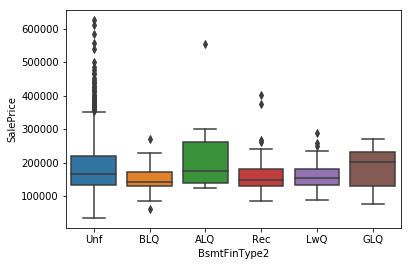

Heating
AxesSubplot(0.125,0.125;0.775x0.755)


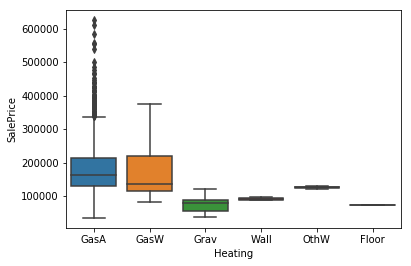

HeatingQC
AxesSubplot(0.125,0.125;0.775x0.755)


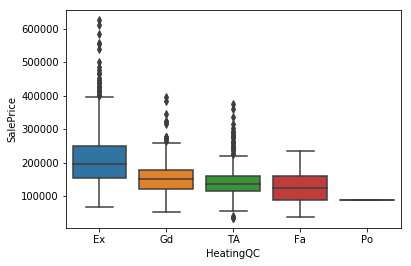

CentralAir
AxesSubplot(0.125,0.125;0.775x0.755)


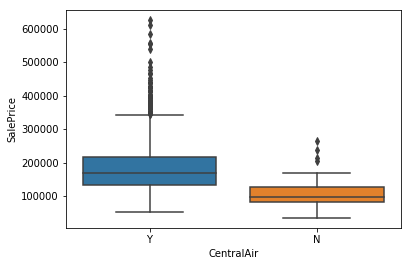

Electrical
AxesSubplot(0.125,0.125;0.775x0.755)


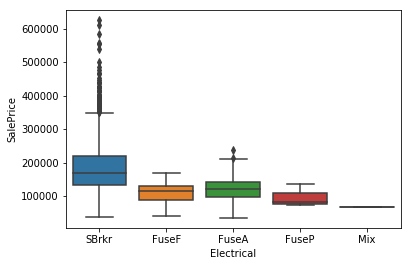

KitchenQual
AxesSubplot(0.125,0.125;0.775x0.755)


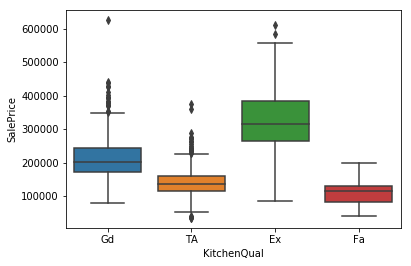

Functional
AxesSubplot(0.125,0.125;0.775x0.755)


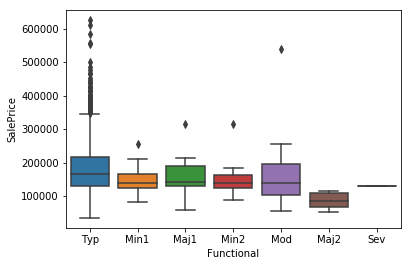

FireplaceQu
AxesSubplot(0.125,0.125;0.775x0.755)


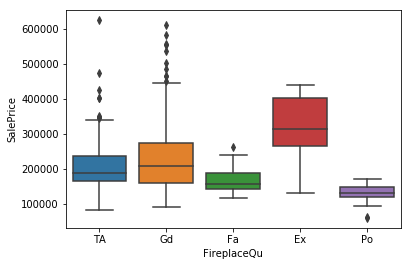

GarageType
AxesSubplot(0.125,0.125;0.775x0.755)


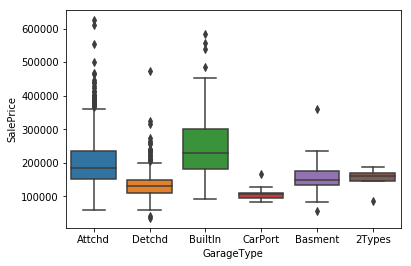

GarageFinish
AxesSubplot(0.125,0.125;0.775x0.755)


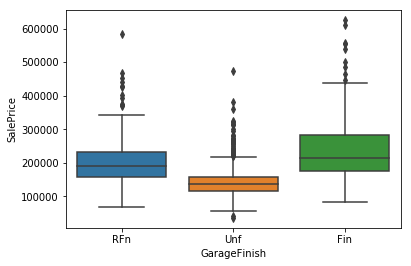

GarageQual
AxesSubplot(0.125,0.125;0.775x0.755)


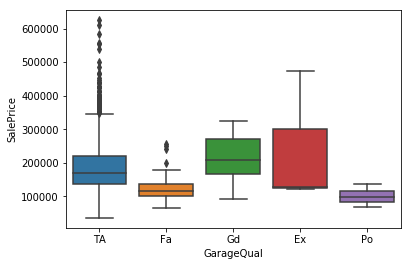

GarageCond
AxesSubplot(0.125,0.125;0.775x0.755)


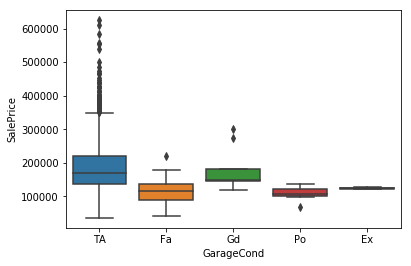

PavedDrive
AxesSubplot(0.125,0.125;0.775x0.755)


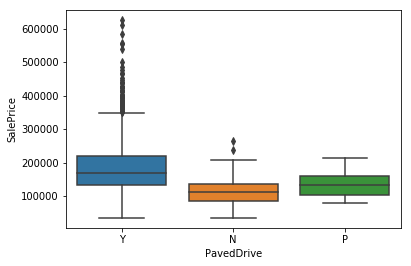

PoolQC
AxesSubplot(0.125,0.125;0.775x0.755)


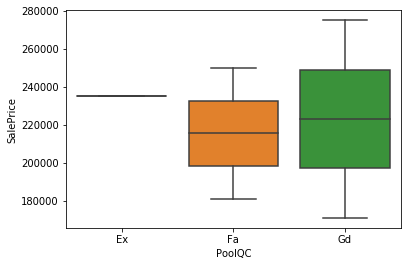

Fence
AxesSubplot(0.125,0.125;0.775x0.755)


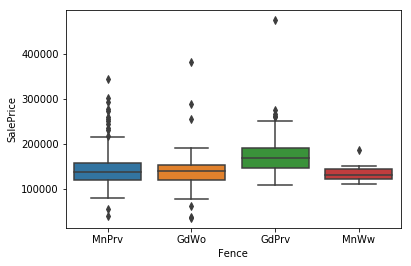

MiscFeature
AxesSubplot(0.125,0.125;0.775x0.755)


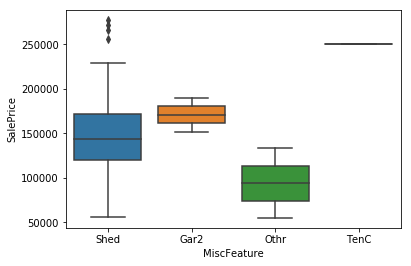

SaleType
AxesSubplot(0.125,0.125;0.775x0.755)


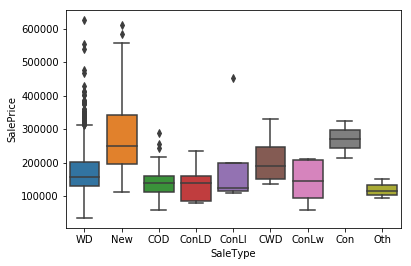

SaleCondition
AxesSubplot(0.125,0.125;0.775x0.755)


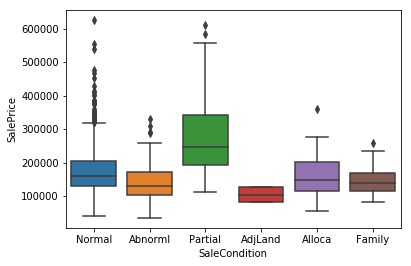

In [22]:
cat_cols = train_data.select_dtypes(exclude = np.number).columns
for i in cat_cols:
    print(i)
    print(sns.boxplot(train_data[i],target))
    plt.show()

In [23]:
##MSZoning has a very different range and we cannot see any order here. Hence One hot encoding
all_data = pd.get_dummies(all_data, columns = ["MSZoning"], drop_first=True)

In [24]:
#No variation in data and hence dropping Street feature
all_data['Street'].value_counts()

Pave    2903
Grvl      12
Name: Street, dtype: int64

In [25]:
all_data.drop(['Street'],1,inplace=True)

In [26]:
## Alley 
all_data = pd.get_dummies(all_data, columns = ["Alley"], drop_first=True)

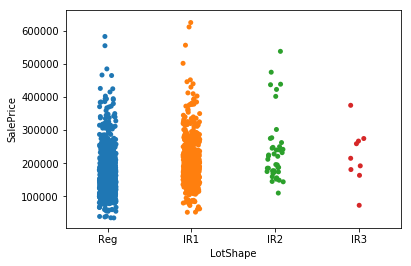

In [27]:
## LotShape
sns.stripplot(train_data['LotShape'],target)

In [28]:
## Lotshape has varying SalePrice across it's values.
all_data = pd.get_dummies(all_data, columns = ["LotShape"], drop_first=True)

In [29]:
## LandContour - no order
all_data = pd.get_dummies(all_data, columns = ["LandContour"], drop_first=True)

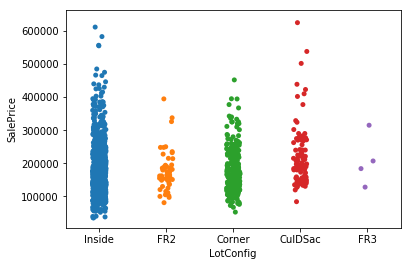

In [30]:
## LotConfig
sns.stripplot(all_data['LotConfig'],target)

In [31]:
## Very less values for FR2 and FR3 so replacing it with FR and then OHE
all_data['LotConfig'] = all_data['LotConfig'].map({"Inside":"Inside", "FR2":"FR", "Corner":"Corner", "CulDSac":"CulDSac", "FR3":"FR"})
all_data = pd.get_dummies(all_data, columns = ["LotConfig"], drop_first=True)

In [32]:
##LandSlope - very less values for Mod and Sev. So create new feature which will check if there is Gtl or not.
all_data['Gentle_slope'] = np.where(all_data['LandSlope']=='Gtl',1,0)

In [33]:
all_data['Gentle_slope'].value_counts()

1    2774
0     141
Name: Gentle_slope, dtype: int64

In [34]:
all_data['LandSlope'].value_counts()

Gtl    2774
Mod     125
Sev      16
Name: LandSlope, dtype: int64

In [35]:
all_data.drop(["LandSlope"],1,inplace=True)

In [36]:
##Neighborhood
all_data = pd.get_dummies(all_data, columns = ["Neighborhood"], drop_first=True)

In [37]:
## Condition1 and Condition2 - clustering based on data description
all_data['Condition1'] = all_data['Condition1'].map({"Norm":"Normal", "Feedr":"Street", "PosN":"Pos", "Artery":"Street", "RRAe":"Train_EW",
                                                    "RRNn":"Train_NS", "RRAn":"Train_NS", "PosA":"Pos", "RRNe":"Train_EW"})
all_data['Condition2'] = all_data['Condition2'].map({"Norm":"Normal", "Feedr":"Street", "PosN":"Pos", "Artery":"Street", "RRAe":"Train_EW",
                                                    "RRNn":"Train_NS", "RRAn":"Train_NS", "PosA":"Pos", "RRNe":"Train_EW"})

In [38]:
##OHE Condition 1 and checking whether Condition 2 has same value as COndition 1. If different replace with 1.
all_data['Condition2'] = np.where(all_data['Condition2'] == all_data['Condition1'],0,1)

In [39]:
all_data = pd.get_dummies(all_data, columns = ["Condition1"], drop_first=True)

In [40]:
##BldgType
all_data = pd.get_dummies(all_data, columns = ["BldgType"], drop_first=True)

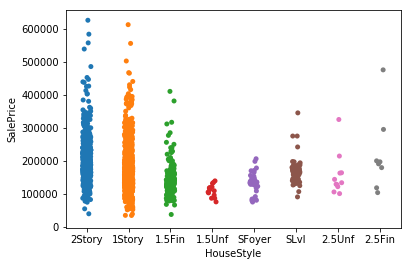

In [41]:
##HouseStype - Few having very less values hence clustering
sns.stripplot(train_data['HouseStyle'],target)

In [42]:
all_data['HouseStyle'] = all_data['HouseStyle'].map({"2Story":"2Story", "1Story":"1Story", "1.5Fin":"1.5Story", "1.5Unf":"1.5Story", 
                                                     "SFoyer":"SFoyer", "SLvl":"SLvl", "2.5Unf":"2.5Story", "2.5Fin":"2.5Story"})

all_data = pd.get_dummies(all_data, columns = ["HouseStyle"], drop_first=True)

In [43]:
## RoofStyle
all_data = pd.get_dummies(all_data, columns = ["RoofStyle"], drop_first=True)

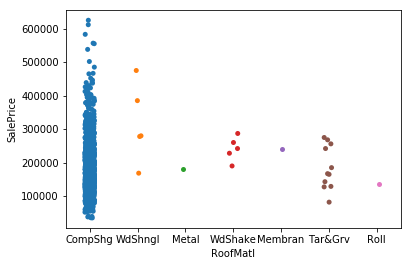

In [44]:
#RoofMatl
sns.stripplot(train_data['RoofMatl'],target)

In [45]:
## Few classes and so CompShg == 1 or else 0
all_data['Standard_RoofMaterial'] = np.where(all_data['RoofMatl']=='CompShg',1,0)

In [46]:
all_data.drop(['RoofMatl'],1,inplace=True)

In [47]:
##Exterior 1st and Exterior 2nd
all_data['Exterior2nd'] = np.where(all_data['Exterior1st'] == all_data['Exterior2nd'],0,1)
all_data = pd.get_dummies(all_data, columns = ["Exterior1st"], drop_first=True)

In [48]:
## MAsVnrType
all_data = pd.get_dummies(all_data, columns = ["MasVnrType"])

In [49]:
all_data.drop('MasVnrType_None',1,inplace=True)

In [50]:
## ExterQual
all_data['ExterQual'] = all_data['ExterQual'].map({"Fa":1, "TA":2, "Gd":3, "Ex":4}).astype(int)

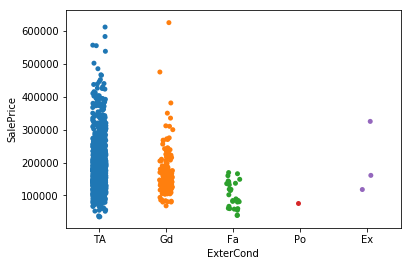

In [51]:
## ExterCond
sns.stripplot(all_data['ExterCond'],target)

In [52]:
## No order as only three values for Excellent and major values for Average/Typical. Hence OHE
all_data = pd.get_dummies(all_data, columns = ["ExterCond"], drop_first=True)

In [53]:
## Foundation
all_data = pd.get_dummies(all_data, columns = ["Foundation"], drop_first=True)

In [54]:
## BsmtQual
all_data['BsmtQual'] = all_data['BsmtQual'].map({"None":0, "Fa":1, "TA":2, "Gd":3, "Ex":4})

In [55]:
all_data.head()

,MSSubClass,LotFrontage,LotArea,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,OverallQual-2,GrLivArea-2,GarageCars-2,GarageArea-2,TotalBsmtSF-2,1stFlrSF-2,FullBath-2,TotRmsAbvGrd-2,Fireplaces-2,MasVnrArea-2,OverallQual-3,GrLivArea-3,GarageCars-3,GarageArea-3,TotalBsmtSF-3,1stFlrSF-3,FullBath-3,TotRmsAbvGrd-3,Fireplaces-3,MasVnrArea-3,OverallQual-Sq,GrLivArea-Sq,GarageCars-Sq,GarageArea-Sq,TotalBsmtSF-Sq,1stFlrSF-Sq,FullBath-Sq,TotRmsAbvGrd-Sq,Fireplaces-Sq,MasVnrArea-Sq,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,Gentle_slope,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Pos,Condition1_Street,Condition1_Train_EW,Condition1_Train_NS,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Standard_RoofMaterial,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,65.00,8450,0,7,5,2003,2003,0,196.00,3,3,TA,No,GLQ,706.00,Unf,0.00,150.00,856.00,GasA,Ex,Y,SBrkr,856,854,0,1710,1.00,0.00,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.00,RFn,2.00,548.00,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,49,2924100,4.00,300304.00,732736.00,732736,4,64,0,38416.00,343,5000211000,8.00,164566592.00,627222016.00,627222016,8,512,0,7529536.00,2.65,41.35,1.41,23.41,29.26,29.26,1.41,2.83,0.00,14.00,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,20,80.00,9600,1,6,8,1976,1976,0,0.00,2,3,TA,Gd,ALQ,978.00,Unf,0.00,284.00,1262.00,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.00,1.00,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2.00,460.00,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,36,1592644,4.00,211600.00,1592644.00,1592644,4,36,1,0.00,216,2009916728,8.00,97336000.00,2009916728.00,2009916728,8,216,1,0.00,2.45,35.52,1.41,21.45,35.52,35.52,1.41,2.45,1.00,0.00,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,60,68.00,11250,0,7,5,2001,2002,0,162.00,3,3,TA,Mn,GLQ,486.00,Unf,0.00,434.00,920.00,GasA,Ex,Y,SBrkr,920,866,0,1786,1.00,0.00,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2.00,608.00,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,49,3189796,4.00,36

In [56]:
## BsmtCond
all_data['BsmtCond'] = all_data['BsmtCond'].map({"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})


In [57]:
## BsmtExposure
all_data['BsmtExposure'] = all_data['BsmtExposure'].map({"None":0, "No":1, "Mn":2, "Av":3, "Gd":4})

In [58]:
##BsmtFinType1 and BsmtFinType2
all_data = pd.get_dummies(all_data, columns = ["BsmtFinType1"], drop_first=True)

all_data = pd.get_dummies(all_data, columns = ["BsmtFinType2"], drop_first=True)
all_data.head()

,MSSubClass,LotFrontage,LotArea,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,OverallQual-2,GrLivArea-2,GarageCars-2,GarageArea-2,TotalBsmtSF-2,1stFlrSF-2,FullBath-2,TotRmsAbvGrd-2,Fireplaces-2,MasVnrArea-2,OverallQual-3,GrLivArea-3,GarageCars-3,GarageArea-3,TotalBsmtSF-3,1stFlrSF-3,FullBath-3,TotRmsAbvGrd-3,Fireplaces-3,MasVnrArea-3,OverallQual-Sq,GrLivArea-Sq,GarageCars-Sq,GarageArea-Sq,TotalBsmtSF-Sq,1stFlrSF-Sq,FullBath-Sq,TotRmsAbvGrd-Sq,Fireplaces-Sq,MasVnrArea-Sq,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,Gentle_slope,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Pos,Condition1_Street,Condition1_Train_EW,Condition1_Train_NS,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Standard_RoofMaterial,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf
0,60,65.00,8450,0,7,5,2003,2003,0,196.00,3,3,3,1,706.00,0.00,150.00,856.00,GasA,Ex,Y,SBrkr,856,854,0,1710,1.00,0.00,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.00,RFn,2.00,548.00,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,49,2924100,4.00,300304.00,732736.00,732736,4,64,0,38416.00,343,5000211000,8.00,164566592.00,627222016.00,627222016,8,512,0,7529536.00,2.65,41.35,1.41,23.41,29.26,29.26,1.41,2.83,0.00,14.00,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,20,80.00,9600,1,6,8,1976,1976,0,0.00,2,3,3,4,978.00,0.00,284.00,1262.00,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.00,1.00,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2.00,460.00,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,36,1592644,4.00,211600.00,1592644.00,1592644,4,36,1,0.00,216,2009916728,8.00,97336000.00,2009916728.00,2009916728,8,216,1,0.00,2.45,35.52,1.41,21.45,35.52,35.52,1.41,2.45,1.00,0.00,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,68.00,11250,0,7,5,2001,2002,0,162.00,3,3

In [59]:
## Heating - No variation
all_data.drop(['Heating'],1,inplace=True)

In [60]:
## HeatingQC
all_data['HeatingQC'] = all_data['HeatingQC'].map({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})

In [61]:
## CentralAir
all_data['CentralAir'] = all_data['CentralAir'].map({"Y":1, "N":0})

In [62]:
## Electrical
all_data['Electrical'] = all_data['Electrical'].map({"SBrkr":"SBrkr", "FuseF":"Fuse", "FuseA":"Fuse", "FuseP":"Fuse", "Mix":"Fuse"})

all_data = pd.get_dummies(all_data, columns = ["Electrical"], drop_first=True)


In [63]:
## KitchenQual
all_data['KitchenQual'] = all_data['KitchenQual'].map({"Fa":1, "TA":2, "Gd":3, "Ex":4})


In [64]:
#Functional
all_data['Functional'] = all_data['Functional'].map({"Sev":1, "Maj2":2, "Maj1":3, "Mod":4, "Min2":5, "Min1":6, "Typ":7})


In [65]:
## FireplaceQu

In [66]:
all_data['FireplaceQu'] = all_data['FireplaceQu'].map({"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})

In [67]:
##GarageType
all_data = pd.get_dummies(all_data, columns = ["GarageType"], drop_first=True)

In [68]:
## GarageFinish
all_data = pd.get_dummies(all_data, columns = ["GarageFinish"], drop_first=True)

In [69]:
## GarageQual
all_data = pd.get_dummies(all_data, columns = ["GarageQual"], drop_first=True)

In [70]:
## GarageCond
all_data = pd.get_dummies(all_data, columns = ["GarageCond"], drop_first=True)

In [71]:
## PavedDrive
all_data = pd.get_dummies(all_data, columns = ["PavedDrive"], drop_first=True)

In [72]:
## PoolQC - No variation
all_data.drop('PoolQC', axis=1, inplace=True)

In [73]:
## Fence 
all_data = pd.get_dummies(all_data, columns = ["Fence"], drop_first=True)

In [74]:
## No variation in MiscFeature.
cols=['MiscFeature', 'MiscVal']
all_data.drop(cols, axis=1, inplace=True)

In [75]:
## SaleType
all_data['SaleType'] = all_data['SaleType'].map({"WD":"WD", "New":"New", "COD":"COD", "CWD":"CWD", "ConLD":"Other", "ConLI":"Other", 
                                                 "ConLw":"Other", "Con":"Other", "Oth":"Other"})

all_data = pd.get_dummies(all_data, columns = ["SaleType"], drop_first=True)


In [76]:
##SaleCondition
all_data = pd.get_dummies(all_data, columns = ["SaleCondition"], drop_first=True)

In [77]:
all_data.head()

,MSSubClass,LotFrontage,LotArea,Condition2,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior2nd,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,OverallQual-2,GrLivArea-2,GarageCars-2,GarageArea-2,TotalBsmtSF-2,1stFlrSF-2,FullBath-2,TotRmsAbvGrd-2,Fireplaces-2,MasVnrArea-2,OverallQual-3,GrLivArea-3,GarageCars-3,GarageArea-3,TotalBsmtSF-3,1stFlrSF-3,FullBath-3,TotRmsAbvGrd-3,Fireplaces-3,MasVnrArea-3,OverallQual-Sq,GrLivArea-Sq,GarageCars-Sq,GarageArea-Sq,TotalBsmtSF-Sq,1stFlrSF-Sq,FullBath-Sq,TotRmsAbvGrd-Sq,Fireplaces-Sq,MasVnrArea-Sq,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,Gentle_slope,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Pos,Condition1_Street,Condition1_Train_EW,Condition1_Train_NS,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Standard_RoofMaterial,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.00,8450,0,7,5,2003,2003,0,196.00,3,3,3,1,706.00,0.00,150.00,856.00,5,1,856,854,0,1710,1.00,0.00,2,1,3,1,3,8,7,0,0,2003.00,2.00,548.00,0,61,0,0,0,0,2,2008,49,2924100,4.00,300304.00,732736.00,732736,4,64,0,38416.00,343,5000211000,8.00,164566592.00,627222016.00,627222016,8,512,0,7529536.00,2.65,41.35,1.41,23.41,29.26,29.26,1.41,2.83,0.00,14.00,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1,20,80.00,9600,1,6,8,1976,1976,0,0.00,2,3,3,4,978.00,0.00,284.00,1262.00,5,1,1262,0,0,1262,0.00,1.00,2,0,3,1,2,6,7,1,3,1976.00,2.00,460.00,298,0,0,0,0,0,5,2007,36,1592644,4.00,211600.00,1592644.00,1592644,4,36,1,0.0

iv) 
>> Bivariate analysis of numerical features

>> Binning few numerical features based on it's variation

In [78]:
numerical_df = train_data.select_dtypes(include=np.number)
numerical_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], dtype='object')

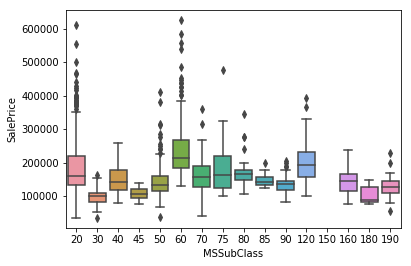

In [79]:
## MSSUBClass is categorical, so OHE
sns.boxplot(all_data['MSSubClass'], target)

In [80]:
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)

all_data = pd.get_dummies(all_data, columns = ["MSSubClass"], drop_first=True)


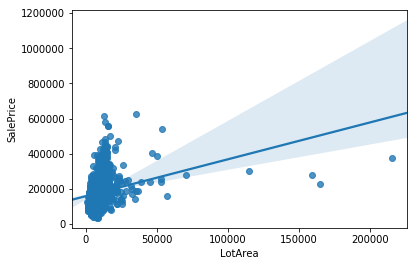

In [81]:
## LotArea - creating quantile bins as it is positively skewed
sns.regplot(train_data['LotArea'],target)

In [82]:
all_data['LotArea_Band'] = pd.qcut(all_data['LotArea'], 8)
all_data['LotArea_Band'].unique()

[(7474.0, 8520.0], (9450.0, 10355.25], (10355.25, 11554.5], (13613.0, 215245.0], (5684.75, 7474.0], (11554.5, 13613.0], (1299.999, 5684.75], (8520.0, 9450.0]]
Categories (8, interval[float64]): [(1299.999, 5684.75] < (5684.75, 7474.0] < (7474.0, 8520.0] < (8520.0, 9450.0] < (9450.0, 10355.25] < (10355.25, 11554.5] < (11554.5, 13613.0] < (13613.0, 215245.0]]

In [83]:
all_data.loc[all_data['LotArea']<=5684.75, 'LotArea'] = 1
all_data.loc[(all_data['LotArea']>5684.75) & (all_data['LotArea']<=7474), 'LotArea'] = 2
all_data.loc[(all_data['LotArea']>7474) & (all_data['LotArea']<=8520), 'LotArea'] = 3
all_data.loc[(all_data['LotArea']>8520) & (all_data['LotArea']<=9450), 'LotArea'] = 4
all_data.loc[(all_data['LotArea']>9450) & (all_data['LotArea']<=10355.25), 'LotArea'] = 5
all_data.loc[(all_data['LotArea']>10355.25) & (all_data['LotArea']<=11554.25), 'LotArea'] = 6
all_data.loc[(all_data['LotArea']>11554.25) & (all_data['LotArea']<=13613), 'LotArea'] = 7
all_data.loc[all_data['LotArea']>13613, 'LotArea'] = 8
all_data['LotArea'] = all_data['LotArea'].astype(int)

all_data.drop('LotArea_Band', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["LotArea"], drop_first=True)

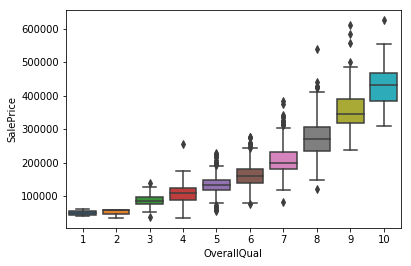

In [84]:
##OverallQual - ordinal in nature
sns.boxplot(train_data['OverallQual'],target)

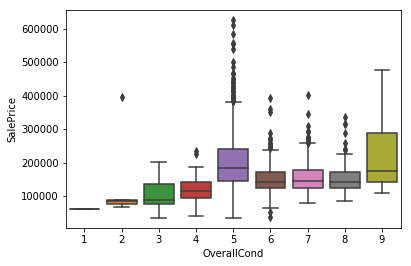

In [85]:
##OverallCond - ordinal in nature
sns.boxplot(train_data['OverallCond'],target)

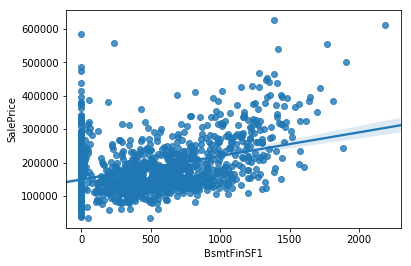

In [86]:
##BsmtFinSF1 - positive correlation and also variation in data points is large hence binning
sns.regplot(train_data['BsmtFinSF1'],target)

In [87]:
all_data['BsmtFinSF1_Band'] = pd.cut(all_data['BsmtFinSF1'], 4)
all_data['BsmtFinSF1_Band'].unique()

[(-4.01, 1002.5], (1002.5, 2005.0], (2005.0, 3007.5], (3007.5, 4010.0]]
Categories (4, interval[float64]): [(-4.01, 1002.5] < (1002.5, 2005.0] < (2005.0, 3007.5] < (3007.5, 4010.0]]

In [88]:
all_data.loc[all_data['BsmtFinSF1']<=1002.5, 'BsmtFinSF1'] = 1
all_data.loc[(all_data['BsmtFinSF1']>1002.5) & (all_data['BsmtFinSF1']<=2005), 'BsmtFinSF1'] = 2
all_data.loc[(all_data['BsmtFinSF1']>2005) & (all_data['BsmtFinSF1']<=3007.5), 'BsmtFinSF1'] = 3
all_data.loc[all_data['BsmtFinSF1']>3007.5, 'BsmtFinSF1'] = 4
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].astype(int)

all_data.drop('BsmtFinSF1_Band', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["BsmtFinSF1"], drop_first=True)

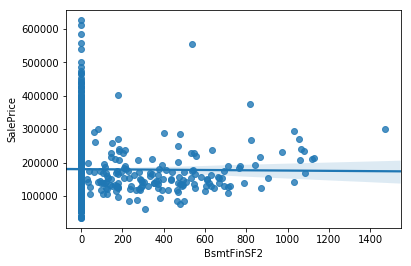

In [89]:
##BsmtFinSF2 - large number values as 0 and hence flag
sns.regplot(train_data['BsmtFinSF2'],target)

In [90]:
all_data['BsmtFinSf2_Flag'] = all_data['BsmtFinSF2'].map(lambda x:0 if x==0 else 1)
all_data.drop('BsmtFinSF2', axis=1, inplace=True)

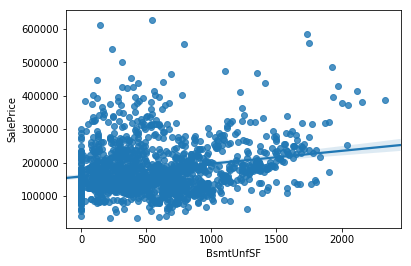

In [91]:
## BsmtUnfSF - binning as lot of variation in data
sns.regplot(train_data['BsmtUnfSF'],target)

In [92]:
all_data['BsmtUnfSF_Band'] = pd.cut(all_data['BsmtUnfSF'], 3)
all_data['BsmtUnfSF_Band'].unique()

[(-2.336, 778.667], (778.667, 1557.333], (1557.333, 2336.0]]
Categories (3, interval[float64]): [(-2.336, 778.667] < (778.667, 1557.333] < (1557.333, 2336.0]]

In [93]:
all_data.loc[all_data['BsmtUnfSF']<=778.667, 'BsmtUnfSF'] = 1
all_data.loc[(all_data['BsmtUnfSF']>778.667) & (all_data['BsmtUnfSF']<=1557.333), 'BsmtUnfSF'] = 2
all_data.loc[all_data['BsmtUnfSF']>1557.333, 'BsmtUnfSF'] = 3
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].astype(int)

all_data.drop('BsmtUnfSF_Band', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["BsmtUnfSF"], drop_first=True)

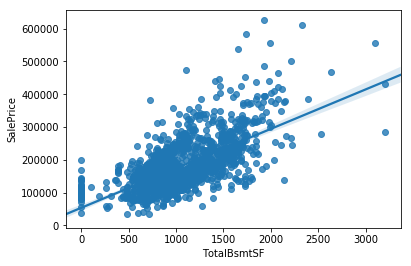

In [94]:
##TotalBsmtSF - binning
sns.regplot(train_data['TotalBsmtSF'],target)

In [95]:
all_data['TotalBsmtSF_Band'] = pd.cut(all_data['TotalBsmtSF'], 10)
all_data['TotalBsmtSF_Band'].unique()

[(509.5, 1019.0], (1019.0, 1528.5], (1528.5, 2038.0], (-5.095, 509.5], (2038.0, 2547.5], (3057.0, 3566.5], (2547.5, 3057.0], (4585.5, 5095.0]]
Categories (8, interval[float64]): [(-5.095, 509.5] < (509.5, 1019.0] < (1019.0, 1528.5] < (1528.5, 2038.0] < (2038.0, 2547.5] < (2547.5, 3057.0] < (3057.0, 3566.5] < (4585.5, 5095.0]]

In [96]:
all_data.loc[all_data['TotalBsmtSF']<=509.5, 'TotalBsmtSF'] = 1
all_data.loc[(all_data['TotalBsmtSF']>509.5) & (all_data['TotalBsmtSF']<=1019), 'TotalBsmtSF'] = 2
all_data.loc[(all_data['TotalBsmtSF']>1019) & (all_data['TotalBsmtSF']<=1528.5), 'TotalBsmtSF'] = 3
all_data.loc[(all_data['TotalBsmtSF']>1528.5) & (all_data['TotalBsmtSF']<=2038), 'TotalBsmtSF'] = 4
all_data.loc[(all_data['TotalBsmtSF']>2038) & (all_data['TotalBsmtSF']<=2547.5), 'TotalBsmtSF'] = 5
all_data.loc[(all_data['TotalBsmtSF']>2547.5) & (all_data['TotalBsmtSF']<=3057), 'TotalBsmtSF'] = 6
all_data.loc[(all_data['TotalBsmtSF']>3057) & (all_data['TotalBsmtSF']<=3566.5), 'TotalBsmtSF'] = 7
all_data.loc[all_data['TotalBsmtSF']>3566.5, 'TotalBsmtSF'] = 8
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].astype(int)

all_data.drop('TotalBsmtSF_Band', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["TotalBsmtSF"], drop_first=True)

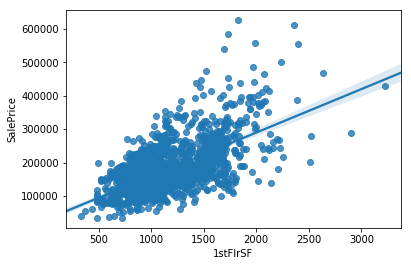

In [97]:
## 1stFlrSF 
sns.regplot(train_data['1stFlrSF'],target)

In [98]:
all_data['1stFlrSF_Band'] = pd.cut(all_data['1stFlrSF'], 6)
all_data['1stFlrSF_Band'].unique()

[(329.239, 1127.5], (1127.5, 1921.0], (1921.0, 2714.5], (2714.5, 3508.0], (3508.0, 4301.5], (4301.5, 5095.0]]
Categories (6, interval[float64]): [(329.239, 1127.5] < (1127.5, 1921.0] < (1921.0, 2714.5] < (2714.5, 3508.0] < (3508.0, 4301.5] < (4301.5, 5095.0]]

In [99]:
all_data.loc[all_data['1stFlrSF']<=1127.5, '1stFlrSF'] = 1
all_data.loc[(all_data['1stFlrSF']>1127.5) & (all_data['1stFlrSF']<=1921), '1stFlrSF'] = 2
all_data.loc[(all_data['1stFlrSF']>1921) & (all_data['1stFlrSF']<=2714.5), '1stFlrSF'] = 3
all_data.loc[(all_data['1stFlrSF']>2714.5) & (all_data['1stFlrSF']<=3508), '1stFlrSF'] = 4
all_data.loc[(all_data['1stFlrSF']>3508) & (all_data['1stFlrSF']<=4301.5), '1stFlrSF'] = 5
all_data.loc[all_data['1stFlrSF']>4301.5, '1stFlrSF'] = 6
all_data['1stFlrSF'] = all_data['1stFlrSF'].astype(int)

all_data.drop('1stFlrSF_Band', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["1stFlrSF"], drop_first=True)

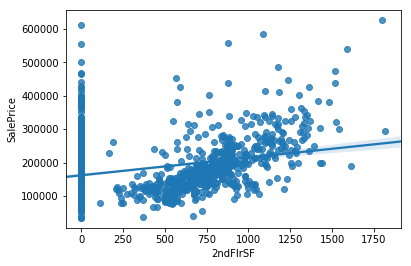

In [100]:
## 2ndFlrSF
sns.regplot(train_data['2ndFlrSF'],target)

In [101]:
all_data['2ndFlrSF_Band'] = pd.cut(all_data['2ndFlrSF'], 6)
all_data['2ndFlrSF_Band'].unique()

[(620.667, 931.0], (-1.862, 310.333], (931.0, 1241.333], (310.333, 620.667], (1241.333, 1551.667], (1551.667, 1862.0]]
Categories (6, interval[float64]): [(-1.862, 310.333] < (310.333, 620.667] < (620.667, 931.0] < (931.0, 1241.333] < (1241.333, 1551.667] < (1551.667, 1862.0]]

In [102]:
all_data.loc[all_data['2ndFlrSF']<=310.333, '2ndFlrSF'] = 1
all_data.loc[(all_data['2ndFlrSF']>310.333) & (all_data['2ndFlrSF']<=620.667), '2ndFlrSF'] = 2
all_data.loc[(all_data['2ndFlrSF']>620.667) & (all_data['2ndFlrSF']<=931), '2ndFlrSF'] = 3
all_data.loc[(all_data['2ndFlrSF']>931) & (all_data['2ndFlrSF']<=1241.333), '2ndFlrSF'] = 4
all_data.loc[(all_data['2ndFlrSF']>1241.333) & (all_data['2ndFlrSF']<=1551.667), '2ndFlrSF'] = 5
all_data.loc[all_data['2ndFlrSF']>1551.667, '2ndFlrSF'] = 6
all_data['2ndFlrSF'] = all_data['2ndFlrSF'].astype(int)

all_data.drop('2ndFlrSF_Band', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["2ndFlrSF"], drop_first=True)

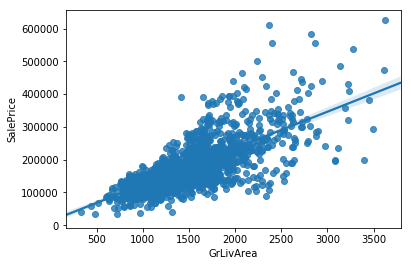

In [103]:
## GrLivArea
sns.regplot(train_data['GrLivArea'],target)

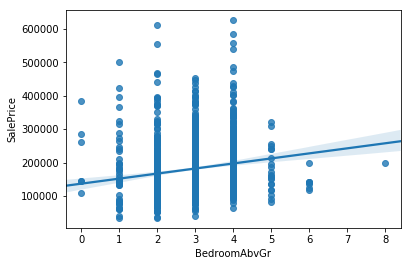

In [104]:
## BedroomAbvGr
sns.regplot(train_data['BedroomAbvGr'],target)

In [105]:
all_data = pd.get_dummies(all_data, columns = ['BedroomAbvGr'], drop_first=True)

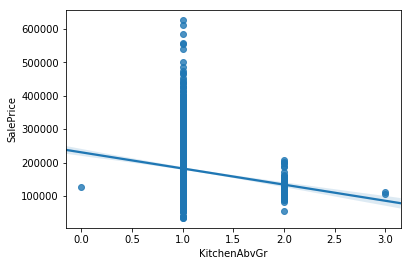

In [106]:
## KitchenAbvGr
sns.regplot(train_data['KitchenAbvGr'], target)

In [107]:
all_data = pd.get_dummies(all_data, columns=['KitchenAbvGr'], drop_first=True)

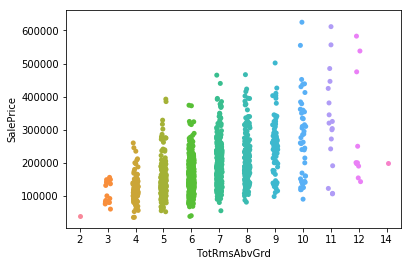

In [108]:
## TotRmsAbvGrd - ordinal in nature
sns.stripplot(train_data['TotRmsAbvGrd'],target)

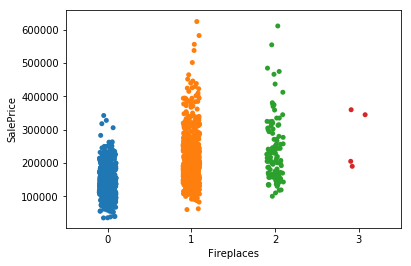

In [109]:
## FirePlaces
sns.stripplot(train_data['Fireplaces'],target)

In [110]:
all_data = pd.get_dummies(all_data, columns=['Fireplaces'], drop_first=True)

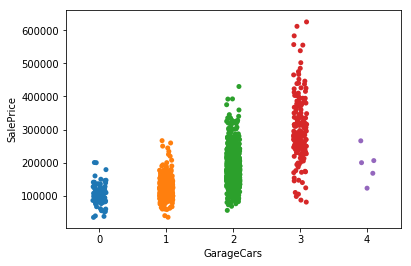

In [111]:
## GarageCars
sns.stripplot(train_data['GarageCars'],target)

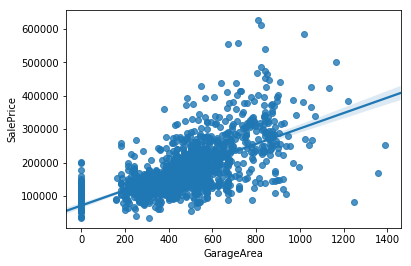

In [112]:
## GarageArea - binning
sns.regplot(train_data['GarageArea'],target)

In [113]:
all_data['GarageArea_Band'] = pd.cut(all_data['GarageArea'], 3)
all_data['GarageArea_Band'].unique()

[(496.0, 992.0], (-1.488, 496.0], (992.0, 1488.0]]
Categories (3, interval[float64]): [(-1.488, 496.0] < (496.0, 992.0] < (992.0, 1488.0]]

In [114]:
all_data.loc[all_data['GarageArea']<=496, 'GarageArea'] = 1
all_data.loc[(all_data['GarageArea']>496) & (all_data['GarageArea']<=992), 'GarageArea'] = 2
all_data.loc[all_data['GarageArea']>992, 'GarageArea'] = 3
all_data['GarageArea'] = all_data['GarageArea'].astype(int)

all_data.drop('GarageArea_Band', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["GarageArea"], drop_first=True)

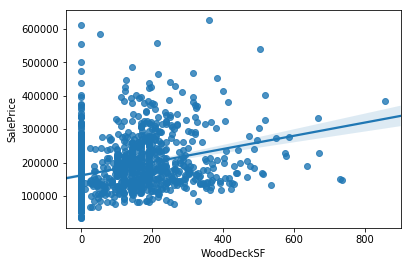

In [115]:
## WoodDeckSf
sns.regplot(train_data['WoodDeckSF'],target)

In [116]:
all_data['WoodDeckSF_Band'] = pd.cut(all_data['WoodDeckSF'], 4)
all_data['WoodDeckSF_Band'].unique()

[(-1.424, 356.0], (356.0, 712.0], (712.0, 1068.0], (1068.0, 1424.0]]
Categories (4, interval[float64]): [(-1.424, 356.0] < (356.0, 712.0] < (712.0, 1068.0] < (1068.0, 1424.0]]

In [117]:
all_data.loc[all_data['WoodDeckSF']==0, 'WoodDeckSF'] = 0
all_data.loc[(all_data['WoodDeckSF']>0) & (all_data['WoodDeckSF']<=356), 'WoodDeckSF'] = 1
all_data.loc[(all_data['WoodDeckSF']>356) & (all_data['WoodDeckSF']<=712), 'WoodDeckSF'] = 2
all_data.loc[(all_data['WoodDeckSF']>712) & (all_data['WoodDeckSF']<=1068), 'WoodDeckSF'] = 3
all_data.loc[all_data['WoodDeckSF']>1068, 'WoodDeckSF'] = 4
all_data['WoodDeckSF'] = all_data['WoodDeckSF'].astype(int)

all_data.drop('WoodDeckSF_Band', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["WoodDeckSF"], drop_first=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text xticklabel objects>)

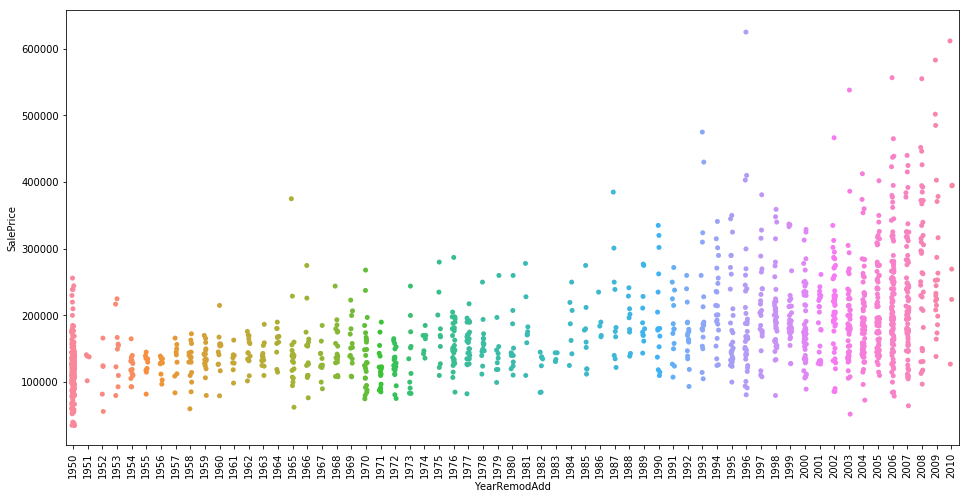

In [118]:
## YearRemodAdd - same as construction date if no remodelling or additions
plt.figure(figsize=(16,8))
sns.stripplot(all_data['YearRemodAdd'],target)
plt.xticks(rotation = 90)

In [119]:
##There is a upward trend and hence creating new feature to get difference between remodeling and construction.
all_data['Remodel_diff'] = all_data['YearRemodAdd'] - all_data['YearBuilt']

all_data.drop('YearRemodAdd', axis=1, inplace=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117]), <a list of 118 Text xticklabel objects>)

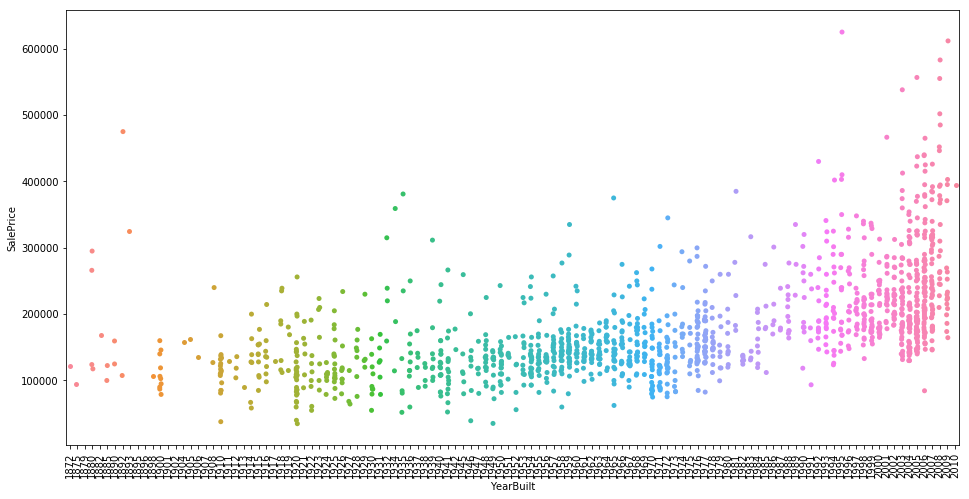

In [120]:
##YearBuilt -  Binning
plt.figure(figsize=(16,8))
sns.stripplot(all_data['YearBuilt'],target)
plt.xticks(rotation = 90)

In [121]:
all_data['YearBuilt_Band'] = pd.cut(all_data['YearBuilt'], 7)
all_data['YearBuilt_Band'].unique()

[(1990.286, 2010.0], (1970.571, 1990.286], (1911.429, 1931.143], (1931.143, 1950.857], (1950.857, 1970.571], (1891.714, 1911.429], (1871.862, 1891.714]]
Categories (7, interval[float64]): [(1871.862, 1891.714] < (1891.714, 1911.429] < (1911.429, 1931.143] < (1931.143, 1950.857] < (1950.857, 1970.571] < (1970.571, 1990.286] < (1990.286, 2010.0]]

In [122]:
all_data.loc[all_data['YearBuilt']<=1892, 'YearBuilt'] = 1
all_data.loc[(all_data['YearBuilt']>1892) & (all_data['YearBuilt']<=1911), 'YearBuilt'] = 2
all_data.loc[(all_data['YearBuilt']>1911) & (all_data['YearBuilt']<=1931), 'YearBuilt'] = 3
all_data.loc[(all_data['YearBuilt']>1931) & (all_data['YearBuilt']<=1951), 'YearBuilt'] = 4
all_data.loc[(all_data['YearBuilt']>1951) & (all_data['YearBuilt']<=1971), 'YearBuilt'] = 5
all_data.loc[(all_data['YearBuilt']>1971) & (all_data['YearBuilt']<=1990), 'YearBuilt'] = 6
all_data.loc[all_data['YearBuilt']>1990, 'YearBuilt'] = 7
all_data['YearBuilt'] = all_data['YearBuilt'].astype(int)

In [123]:
all_data.drop('YearBuilt_Band', axis=1, inplace=True)

In [124]:
all_data = pd.get_dummies(all_data, columns = ["YearBuilt"], drop_first=True)

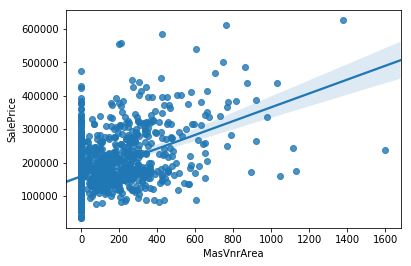

In [125]:
##MasVnrArea - Negligible correlation with SalePrice and high correlation with MasVnrType hence dropping the feature
sns.regplot(train_data['MasVnrArea'],target)

In [126]:

all_data.drop('MasVnrArea', axis=1, inplace=True)

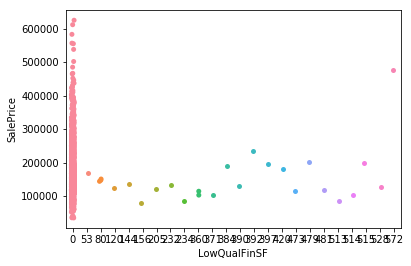

In [127]:
##LowQualFinSF
sns.stripplot(train_data['LowQualFinSF'],target)

In [128]:
## Large values having 0 and hence replacing the feature with flag
all_data['LowQualFinSF'] = all_data['LowQualFinSF'].map(lambda x:0 if x==0 else 1)

In [129]:
## 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'. All depicts number of bathrooms
all_data['TotalBathrooms'] = all_data['BsmtHalfBath'] + all_data['BsmtFullBath'] + all_data['HalfBath'] + all_data['FullBath']

columns = ['BsmtHalfBath', 'BsmtFullBath', 'HalfBath', 'FullBath']
all_data.drop(columns, axis=1, inplace=True)

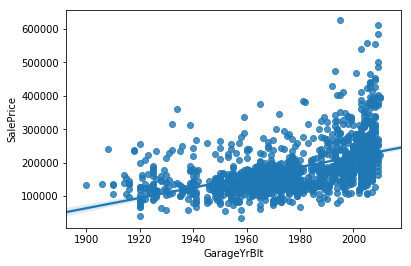

In [130]:
## GarageyrBlt - upward trend and so binning and then dummy variables
sns.regplot(train_data['GarageYrBlt'],target)

In [131]:

all_data['GarageYrBlt_Band'] = pd.qcut(all_data['GarageYrBlt'], 3)
all_data['GarageYrBlt_Band'].unique()

[(1996.0, 2207.0], (1964.0, 1996.0], (-0.001, 1964.0]]
Categories (3, interval[float64]): [(-0.001, 1964.0] < (1964.0, 1996.0] < (1996.0, 2207.0]]

In [132]:
all_data.loc[all_data['GarageYrBlt']<=1964, 'GarageYrBlt'] = 1
all_data.loc[(all_data['GarageYrBlt']>1964) & (all_data['GarageYrBlt']<=1996), 'GarageYrBlt'] = 2
all_data.loc[all_data['GarageYrBlt']>1996, 'GarageYrBlt'] = 3
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(int)

all_data.drop('GarageYrBlt_Band', axis=1, inplace=True)

all_data = pd.get_dummies(all_data, columns = ["GarageYrBlt"])

In [133]:
## 'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch' - adding all porch square feet and keeping only one feature for all the porch area square feet
all_data['TotalPorchSF'] = all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + all_data['3SsnPorch'] + all_data['ScreenPorch'] 

In [134]:
cols = ['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']
for i in cols:
    all_data.drop(i,1,inplace=True)

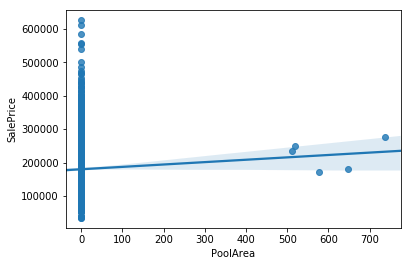

In [135]:
## PoolArea - creating flag
sns.regplot(train_data['PoolArea'],target)

In [136]:

all_data['HasPool'] = np.where(all_data['PoolArea'] == 0,0,1)

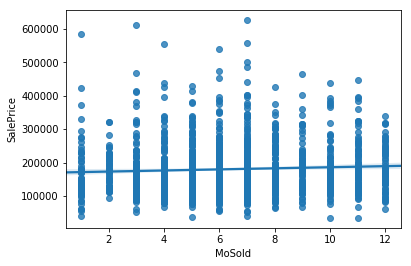

In [137]:
## MoSold - creating dummy variables
sns.regplot(train_data['MoSold'],target)

In [138]:
all_data = pd.get_dummies(all_data, columns = ["MoSold"], drop_first=True)

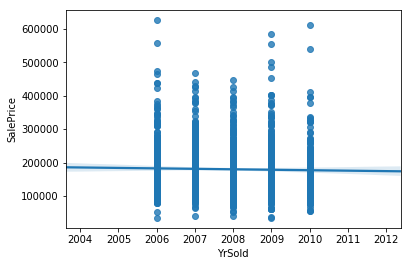

In [139]:
## YrSold - creating dummy variables
sns.regplot(train_data['YrSold'],target)


In [140]:
all_data = pd.get_dummies(all_data, columns = ["YrSold"], drop_first=True)

8) **Treating skewness**

In [141]:
num_feats = list(all_data.select_dtypes(include=np.number).columns)
num_feats

['LotFrontage',
 'Condition2',
 'OverallQual',
 'OverallCond',
 'Exterior2nd',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 'LowQualFinSF',
 'GrLivArea',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'FireplaceQu',
 'GarageCars',
 'PoolArea',
 'OverallQual-2',
 'GrLivArea-2',
 'GarageCars-2',
 'GarageArea-2',
 'TotalBsmtSF-2',
 '1stFlrSF-2',
 'FullBath-2',
 'TotRmsAbvGrd-2',
 'Fireplaces-2',
 'MasVnrArea-2',
 'OverallQual-3',
 'GrLivArea-3',
 'GarageCars-3',
 'GarageArea-3',
 'TotalBsmtSF-3',
 '1stFlrSF-3',
 'FullBath-3',
 'TotRmsAbvGrd-3',
 'Fireplaces-3',
 'MasVnrArea-3',
 'OverallQual-Sq',
 'GrLivArea-Sq',
 'GarageCars-Sq',
 'GarageArea-Sq',
 'TotalBsmtSF-Sq',
 '1stFlrSF-Sq',
 'FullBath-Sq',
 'TotRmsAbvGrd-Sq',
 'Fireplaces-Sq',
 'MasVnrArea-Sq',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Alley_None',
 'Alley_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandCont

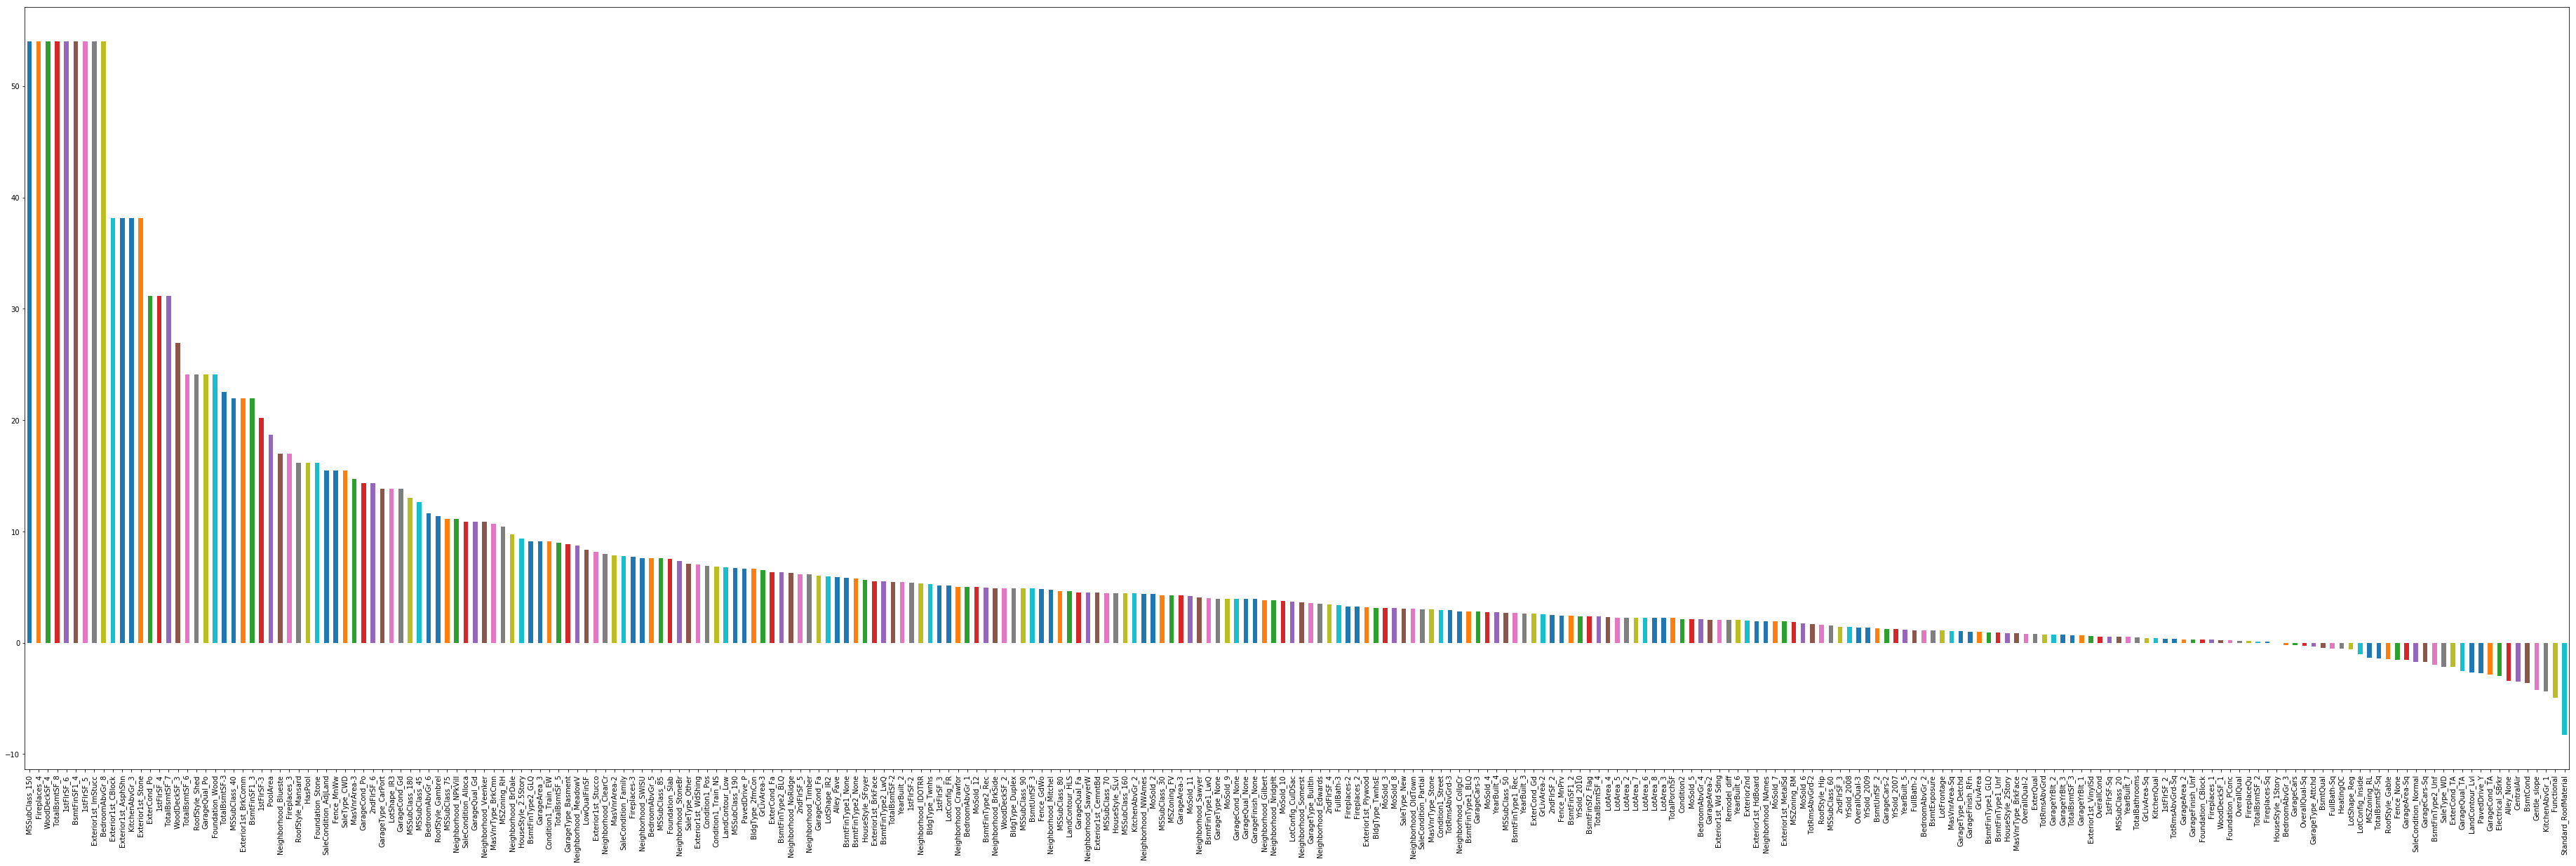

In [142]:
skewed_feats = all_data[num_feats].skew().sort_values(ascending=False)

plt.subplots(figsize =(65, 20))
skewed_feats.plot(kind='bar')

In [143]:
skewness = skewed_feats[abs(skewed_feats) > 0.5]

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

In [144]:
all_data_copy = all_data.copy()

In [145]:
target_copy = target.copy()

9). Checking Distribution of Target variable

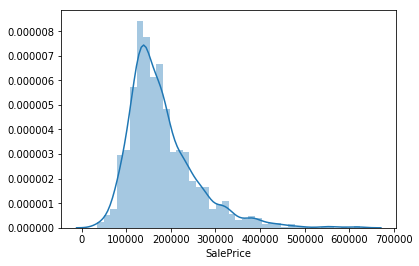

In [146]:
sns.distplot(target_copy)

In [147]:
##Using log1p to convert into normal distribution
target = np.log1p(target)

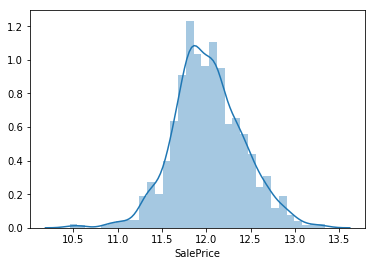

In [148]:
sns.distplot(target)

10) Applying base model with cross validation

In [149]:
train_data.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1451,60,RL,62.00,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.00,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1452,20,RL,85.00,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.00,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.00,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1453,70,RL,66.00,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.00,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.00,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1454,20,RL,68.00,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.00,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1455,20,RL,75.00,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.00,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.00,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal


In [150]:
all_data.iloc[1450:1460,:]

,LotFrontage,Condition2,OverallQual,OverallCond,Exterior2nd,ExterQual,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageCars,PoolArea,OverallQual-2,GrLivArea-2,GarageCars-2,GarageArea-2,TotalBsmtSF-2,1stFlrSF-2,FullBath-2,TotRmsAbvGrd-2,Fireplaces-2,MasVnrArea-2,OverallQual-3,GrLivArea-3,GarageCars-3,GarageArea-3,TotalBsmtSF-3,1stFlrSF-3,FullBath-3,TotRmsAbvGrd-3,Fireplaces-3,MasVnrArea-3,OverallQual-Sq,GrLivArea-Sq,GarageCars-Sq,GarageArea-Sq,TotalBsmtSF-Sq,1stFlrSF-Sq,FullBath-Sq,TotRmsAbvGrd-Sq,Fireplaces-Sq,MasVnrArea-Sq,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,Gentle_slope,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Pos,Condition1_Street,Condition1_Train_EW,Condition1_Train_NS,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Standard_RoofMaterial,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,LotArea_2,LotArea_3,LotArea_4,LotArea_5,LotArea_6,LotArea_7,LotArea_8,BsmtFinSF1_2,BsmtFinSF1_3,BsmtFinSF1_4,BsmtFinSf2_Flag,BsmtUnfSF_2,BsmtUnfSF_3,TotalBsmtSF_2,TotalBsmtSF_3,TotalBsmtSF_4,TotalBsmtSF_5,TotalBsmtSF_6,TotalBsmtSF_7,TotalBsmtSF_8,1stFlrSF_2,1stFlrSF_3,1stFlrSF_4,1stFlrSF_5,1stFlrSF_6,2ndFlrSF_2,2ndFlrSF_3,2ndFlrSF_4,2ndFlrSF_5,2ndFlrSF_6,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageArea_2,GarageArea_3,WoodDeckSF_1,WoodDeckSF_2,WoodDeckSF_3,WoodDeckSF_4,Remodel_diff,YearBuilt_2,YearBuilt_3,YearBuilt_4,YearBuilt_5,YearBuilt_6,YearBuilt_7,TotalBathrooms,GarageYrBlt_1,GarageYrBlt_2,GarageYrBlt_3,TotalPorchSF,HasPool,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_

In [151]:
train = all_data.iloc[:1456,:]
train.tail()

,LotFrontage,Condition2,OverallQual,OverallCond,Exterior2nd,ExterQual,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageCars,PoolArea,OverallQual-2,GrLivArea-2,GarageCars-2,GarageArea-2,TotalBsmtSF-2,1stFlrSF-2,FullBath-2,TotRmsAbvGrd-2,Fireplaces-2,MasVnrArea-2,OverallQual-3,GrLivArea-3,GarageCars-3,GarageArea-3,TotalBsmtSF-3,1stFlrSF-3,FullBath-3,TotRmsAbvGrd-3,Fireplaces-3,MasVnrArea-3,OverallQual-Sq,GrLivArea-Sq,GarageCars-Sq,GarageArea-Sq,TotalBsmtSF-Sq,1stFlrSF-Sq,FullBath-Sq,TotRmsAbvGrd-Sq,Fireplaces-Sq,MasVnrArea-Sq,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,Gentle_slope,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Pos,Condition1_Street,Condition1_Train_EW,Condition1_Train_NS,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Standard_RoofMaterial,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,LotArea_2,LotArea_3,LotArea_4,LotArea_5,LotArea_6,LotArea_7,LotArea_8,BsmtFinSF1_2,BsmtFinSF1_3,BsmtFinSF1_4,BsmtFinSf2_Flag,BsmtUnfSF_2,BsmtUnfSF_3,TotalBsmtSF_2,TotalBsmtSF_3,TotalBsmtSF_4,TotalBsmtSF_5,TotalBsmtSF_6,TotalBsmtSF_7,TotalBsmtSF_8,1stFlrSF_2,1stFlrSF_3,1stFlrSF_4,1stFlrSF_5,1stFlrSF_6,2ndFlrSF_2,2ndFlrSF_3,2ndFlrSF_4,2ndFlrSF_5,2ndFlrSF_6,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageArea_2,GarageArea_3,WoodDeckSF_1,WoodDeckSF_2,WoodDeckSF_3,WoodDeckSF_4,Remodel_diff,YearBuilt_2,YearBuilt_3,YearBuilt_4,YearBuilt_5,YearBuilt_6,YearBuilt_7,TotalBathrooms,GarageYrBlt_1,GarageYrBlt_2,GarageYrBlt_3,TotalPorchSF,HasPool,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_

In [152]:
test = all_data.iloc[1456:,:]

In [153]:
test.head()

,LotFrontage,Condition2,OverallQual,OverallCond,Exterior2nd,ExterQual,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,CentralAir,LowQualFinSF,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageCars,PoolArea,OverallQual-2,GrLivArea-2,GarageCars-2,GarageArea-2,TotalBsmtSF-2,1stFlrSF-2,FullBath-2,TotRmsAbvGrd-2,Fireplaces-2,MasVnrArea-2,OverallQual-3,GrLivArea-3,GarageCars-3,GarageArea-3,TotalBsmtSF-3,1stFlrSF-3,FullBath-3,TotRmsAbvGrd-3,Fireplaces-3,MasVnrArea-3,OverallQual-Sq,GrLivArea-Sq,GarageCars-Sq,GarageArea-Sq,TotalBsmtSF-Sq,1stFlrSF-Sq,FullBath-Sq,TotRmsAbvGrd-Sq,Fireplaces-Sq,MasVnrArea-Sq,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR,LotConfig_Inside,Gentle_slope,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Pos,Condition1_Street,Condition1_Train_EW,Condition1_Train_NS,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Standard_RoofMaterial,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,LotArea_2,LotArea_3,LotArea_4,LotArea_5,LotArea_6,LotArea_7,LotArea_8,BsmtFinSF1_2,BsmtFinSF1_3,BsmtFinSF1_4,BsmtFinSf2_Flag,BsmtUnfSF_2,BsmtUnfSF_3,TotalBsmtSF_2,TotalBsmtSF_3,TotalBsmtSF_4,TotalBsmtSF_5,TotalBsmtSF_6,TotalBsmtSF_7,TotalBsmtSF_8,1stFlrSF_2,1stFlrSF_3,1stFlrSF_4,1stFlrSF_5,1stFlrSF_6,2ndFlrSF_2,2ndFlrSF_3,2ndFlrSF_4,2ndFlrSF_5,2ndFlrSF_6,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageArea_2,GarageArea_3,WoodDeckSF_1,WoodDeckSF_2,WoodDeckSF_3,WoodDeckSF_4,Remodel_diff,YearBuilt_2,YearBuilt_3,YearBuilt_4,YearBuilt_5,YearBuilt_6,YearBuilt_7,TotalBathrooms,GarageYrBlt_1,GarageYrBlt_2,GarageYrBlt_3,TotalPorchSF,HasPool,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_

In [154]:
train.shape

(1456, 274)

In [155]:
test.shape

(1459, 274)

In [156]:
all_data.shape

(2915, 274)

In [157]:
def generate_csv(filename, y_pred_final, test_id):
    final_df = pd.DataFrame({'Id':test_id, 'SalePrice':pd.Series(y_pred_final)})
    final_df.to_csv(filename+'.csv',index=False)

In [158]:
def run_model(train, target, model, test, test_id, model_name):
    X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size=0.3, random_state=42)
    model.fit(X_train,Y_train)
    training_results = np.sqrt((-cross_val_score(model, X_train, Y_train, cv = 10, scoring= 'neg_mean_squared_error')).mean())
    y_pred = model.predict(X_test)
    test_results = np.sqrt(mean_squared_error(Y_test,y_pred))
    print("Scores for ", model_name, " : ", model )
    print()
    print("Training scores: ", training_results)
    print("Test scores ", test_results)
    print()
    print("Testing on submission file...")
    y_pred_final = np.expm1(model.predict(test))
    generate_csv(model_name, y_pred_final, test_id)
    print("Submission file generated")
    

models = {'Linear Regression':LinearRegression,'Decision Tree':DecisionTreeRegressor,
          'Random Forest': RandomForestRegressor,'XGBoost':XGBRegressor,
          'Elastic Net':ElasticNet, 'Ridge':Ridge, 'Lasso': Lasso }
for i in models.items():
    # run model
    model = i[1]()
    model_name = i[0]
    run_model(train, target, model, test, test_id, model_name) # train and returns AUC test score

Scores for  Linear Regression  :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Training scores:  0.13569552215535108
Test scores  0.15475483163440412

Testing on submission file...
Submission file generated
Scores for  Decision Tree  :  DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Training scores:  0.20785285148505958
Test scores  0.21057594896851312

Testing on submission file...
Submission file generated
Scores for  Random Forest  :  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
       

11) Optimizing good performing models  with Grid Search
>> Ridge

>> Random Forest

>> XGBoost

>> ElasticNet

In [159]:
## Ridge
ridge = Ridge()
X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size=0.3, random_state=42)
Ridge_params = {'alpha': np.arange(0.01,1.0,0.01), 'fit_intercept' : ['True','False'], 'normalize' : ['False']}
grid_ridge = GridSearchCV(ridge, param_grid = Ridge_params, cv = 10, scoring = 'neg_mean_squared_error')
grid_ridge.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.01, 0.02, ..., 0.98, 0.99]), 'fit_intercept': ['True', 'False'], 'normalize': ['False']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [160]:
print("Optimized Ridge model....")
print()
print("Best parameters : ", grid_ridge.best_params_)
print()
print("Best Score on training data : ", np.sqrt(-(grid_ridge.best_score_)))
print()
y_pred = grid_ridge.best_estimator_.predict(X_test)
ridge_score = np.sqrt(mean_squared_error(Y_test,y_pred))
print("Score on test data : ", ridge_score)
y_pred_final = np.expm1(grid_ridge.best_estimator_.predict(test))
print()
generate_csv("Optimized_ridge", y_pred_final, test_id)
print("Submission file generated")

Optimized Ridge model....

Best parameters :  {'alpha': 0.23, 'fit_intercept': 'True', 'normalize': 'False'}

Best Score on training data :  0.11805935029624934

Score on test data :  0.1254365633290971

Submission file generated


In [161]:
# ## Random Forest
# print("Optimized Random Forest model....")
# random_forest_params = {'n_estimators': [200], 'criterion' : ['mse'], 
#                         'max_features': ['auto','sqrt','log2'],
#                        'oob_score':['False','True'],
#                        'min_samples_split': np.arange(5,15,1), 'warm_start':[True,False]}
# rf = RandomForestRegressor()
# X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size=0.3, random_state=42)

# grid_rf = GridSearchCV(rf, param_grid = random_forest_params, cv = 10, scoring = 'neg_mean_squared_error')
# grid_rf.fit(X_train,Y_train)


# print()
# print("Best parameters : ", grid_rf.best_params_)
# print()
# print("Best Score on training data : ", np.sqrt(-(grid_rf.best_score_)))
# print()
# y_pred = grid_rf.best_estimator_.predict(X_test)
# rf_score = np.sqrt(mean_squared_error(Y_test,y_pred))
# print("Score on test data : ", rf_score)
# y_pred_final = np.expm1(grid_rf.best_estimator_.predict(test))
# print()
# generate_csv("Optimized_randdom_forest", y_pred_final, test_id)
# print("Submission file generated")

In [162]:
# ## ElasticNet
# print("Optimized Elastic Net model....")
# ElasticNet_params = {'alpha':np.arange(0.01,0.9,0.01),'l1_ratio':np.arange(0.01,0.9,0.01),
#                      'fit_intercept':[True,False],'normalize':[False],'warm_start':[True,False]}
# elasticnet = ElasticNet()
# X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size=0.3, random_state=42)

# grid_elasticnet = GridSearchCV(elasticnet, param_grid = ElasticNet_params, cv = 10, scoring = 'neg_mean_squared_error')
# grid_elasticnet.fit(X_train,Y_train)


# print()
# print("Best parameters : ", grid_elasticnet.best_params_)
# print()
# print("Best Score on training data : ", np.sqrt(-(grid_elasticnet.best_score_)))
# print()
# y_pred = grid_elasticnet.best_estimator_.predict(X_test)
# elasticnet_score = np.sqrt(mean_squared_error(Y_test,y_pred))
# print("Score on test data : ", elasticnet_score)
# y_pred_final = np.expm1(grid_elasticnet.best_estimator_.predict(test))
# print()
# generate_csv("Optimized_ElasticNet", y_pred_final, test_id)
# print("Submission file generated")

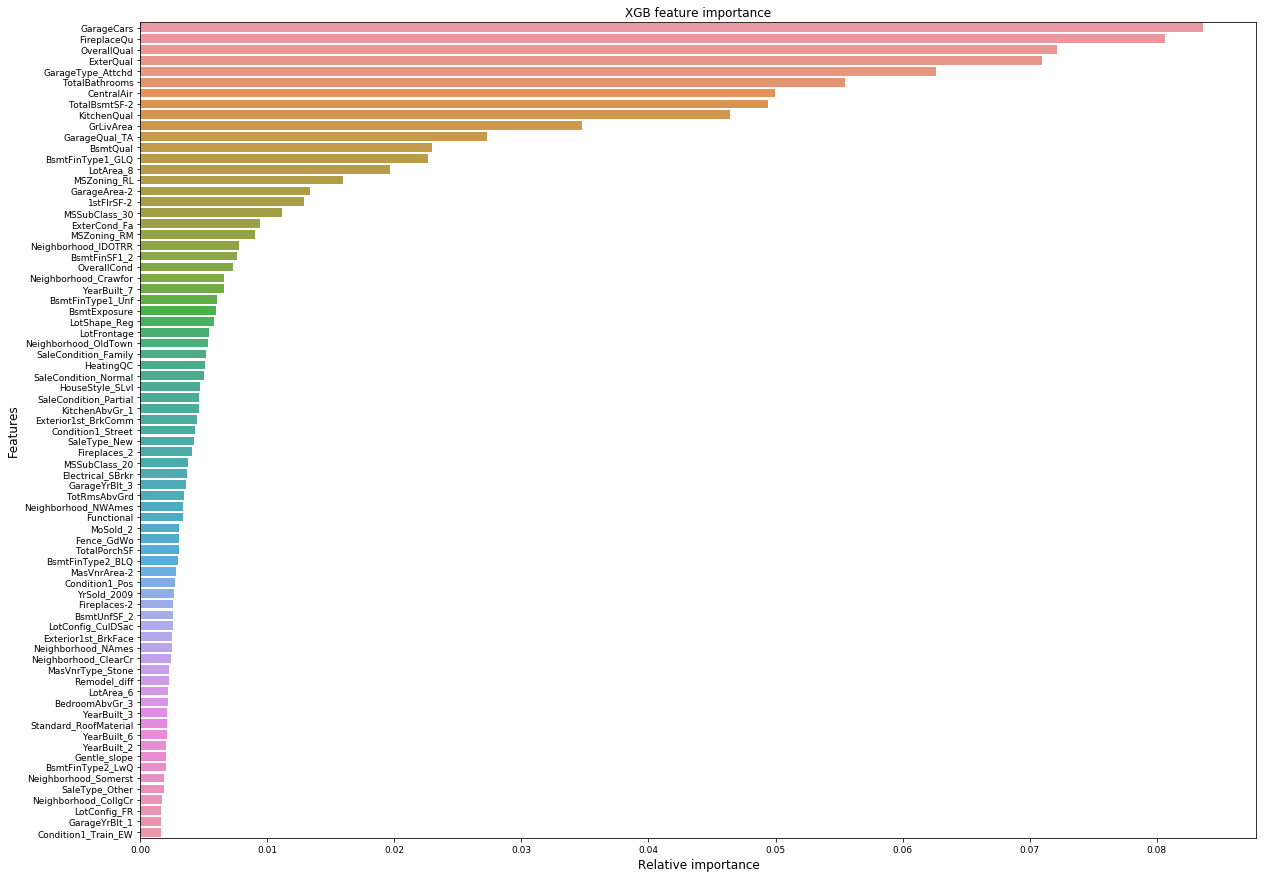

In [163]:
## Feature selection using xgb
model = XGBRegressor()
model.fit(train, target)
# Sort feature importances from GBC model trained earlier
indices = np.argsort(model.feature_importances_)[::-1]
indices = indices[:75]

# Visualise these with a barplot
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=train.columns[indices], x = model.feature_importances_[indices])
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("XGB feature importance");

In [164]:
xgb_train = train.copy()
xgb_test = test.copy()

import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(xgb_train, target)

# Allow the feature importances attribute to select the most important features
xgb_feat_red = SelectFromModel(model, prefit = True)

# Reduce estimation, validation and test datasets
xgb_train = xgb_feat_red.transform(xgb_train)
xgb_test = xgb_feat_red.transform(xgb_test)


print("Results of 'feature_importances_':")
print('X_train: ', xgb_train.shape, '\nX_test: ', xgb_test.shape)

Results of 'feature_importances_':
X_train:  (1456, 42) 
X_test:  (1459, 42)


In [165]:
def run_model(train, target, model, test, test_id, model_name):
    X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size=0.3, random_state=42)
    model.fit(X_train,Y_train)
    training_results = np.sqrt((-cross_val_score(model, X_train, Y_train, cv = 10, scoring= 'neg_mean_squared_error')).mean())
    y_pred = model.predict(X_test)
    test_results = np.sqrt(mean_squared_error(Y_test,y_pred))
    print("Scores for ", model_name, " : ", model )
    print()
    print("Training scores: ", training_results)
    print("Test scores ", test_results)
    print()
    print("Testing on submission file...")
    y_pred_final = np.expm1(model.predict(test))
    generate_csv(model_name, y_pred_final, test_id)
    print("Submission file generated")
    

models = {'Linear Regression':LinearRegression,'Decision Tree':DecisionTreeRegressor,
          'Random Forest': RandomForestRegressor,'XGBoost':XGBRegressor,
          'Elastic Net':ElasticNet, 'Ridge':Ridge, 'Lasso': Lasso }
for i in models.items():
    # run model
    model = i[1]()
    model_name = i[0]
    run_model(xgb_train, target, model, xgb_test, test_id, model_name) # train and returns AUC test score

Scores for  Linear Regression  :  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Training scores:  0.1221215019358133
Test scores  0.13010711299628572

Testing on submission file...
Submission file generated
Scores for  Decision Tree  :  DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Training scores:  0.2032359013509554
Test scores  0.21176989706080346

Testing on submission file...
Submission file generated
Scores for  Random Forest  :  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
         

In [166]:
train_original = train.copy()
test_original = test.copy()

In [167]:
train = xgb_train.copy()
test = xgb_test.copy()

In [168]:
## Ridge
print("Optimized Ridge model....")
print()
ridge = Ridge()
X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size=0.3, random_state=42)
Ridge_params = {'alpha': np.arange(0.01,1.0,0.01), 'fit_intercept' : ['True','False'], 'normalize' : ['False']}
grid_ridge = GridSearchCV(ridge, param_grid = Ridge_params, cv = 10, scoring = 'neg_mean_squared_error')
grid_ridge.fit(X_train,Y_train)

print("Best parameters : ", grid_ridge.best_params_)
print()
print("Best Score on training data : ", np.sqrt(-(grid_ridge.best_score_)))
print()
y_pred = grid_ridge.best_estimator_.predict(X_test)
ridge_score = np.sqrt(mean_squared_error(Y_test,y_pred))
print("Score on test data : ", ridge_score)
y_pred_final = np.expm1(grid_ridge.best_estimator_.predict(test))
print()
generate_csv("Optimized_ridge", y_pred_final, test_id)
print("Submission file generated")

Optimized Ridge model....

Best parameters :  {'alpha': 0.04, 'fit_intercept': 'True', 'normalize': 'False'}

Best Score on training data :  0.12190234799890387

Score on test data :  0.12312259049286185

Submission file generated


In [169]:
## ElasticNet
# print("Optimized Elastic Net model....")
# ElasticNet_params = {'alpha':np.arange(0.01,0.9,0.01),'l1_ratio':np.arange(0.01,0.9,0.01),
#                      'fit_intercept':[True,False],'normalize':[False],'warm_start':[True,False]}
# elasticnet = ElasticNet()
# X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size=0.3, random_state=42)

# grid_elasticnet = GridSearchCV(elasticnet, param_grid = ElasticNet_params, cv = 10, scoring = 'neg_mean_squared_error')
# grid_elasticnet.fit(X_train,Y_train)


# print()
# print("Best parameters : ", grid_elasticnet.best_params_)
# print()
# print("Best Score on training data : ", np.sqrt(-(grid_elasticnet.best_score_)))
# print()
# y_pred = grid_elasticnet.best_estimator_.predict(X_test)
# elasticnet_score = np.sqrt(mean_squared_error(Y_test,y_pred))
# print("Score on test data : ", elasticnet_score)
# y_pred_final = np.expm1(grid_elasticnet.best_estimator_.predict(test))
# print()
# generate_csv("Optimized_ElasticNet", y_pred_final, test_id)
# print("Submission file generated")

In [184]:
## Stacking with feature selection
X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size=0.3, random_state=42)
lr = LinearRegression()
ridge = grid_ridge.best_estimator_
rf = RandomForestRegressor()
xgr = XGBRegressor()
br = BayesianRidge()

stack = StackingCVRegressor(regressors=(lr, ridge, rf, br),
                            meta_regressor=xgr)
stack.fit(X_train,Y_train)
training_results = np.sqrt((-cross_val_score(stack, X_train, Y_train, cv = 10, scoring= 'neg_mean_squared_error')).mean())
y_pred = stack.predict(X_test)
test_results = np.sqrt(mean_squared_error(Y_test,y_pred))
print(training_results)
print()
print(test_results)

0.12069936878596736

0.13033891209692852


In [189]:
y_pred_final = np.expm1(stack.predict(test))
generate_csv("stack1",y_pred_final,test_id)

In [185]:
##Stacking without feature selection
X_train, X_test, Y_train, Y_test = train_test_split(train_original, target, test_size=0.3, random_state=42)
lr = LinearRegression()
ridge = grid_ridge.best_estimator_
rf = RandomForestRegressor()
xgr = XGBRegressor()
br = BayesianRidge()

stack = StackingCVRegressor(regressors=(lr, ridge, rf, br),
                            meta_regressor=xgr)
stack.fit(X_train,Y_train)
training_results = np.sqrt((-cross_val_score(stack, X_train, Y_train, cv = 10, scoring= 'neg_mean_squared_error')).mean())
y_pred = stack.predict(X_test)
test_results = np.sqrt(mean_squared_error(Y_test,y_pred))
print(training_results)
print()
print(test_results)

0.11955336702211941

0.12618472341002168


In [190]:
y_pred_final = np.expm1(stack.predict(test_original))
generate_csv("stack",y_pred_final,test_id)

In [187]:
## Applying Bayesian ridge
X_train, X_test, Y_train, Y_test = train_test_split(train_original, target, test_size=0.3, random_state=42)
br = BayesianRidge()
br.fit(X_train,Y_train)
training_results = np.sqrt((-cross_val_score(br, X_train, Y_train, cv = 10, scoring= 'neg_mean_squared_error')).mean())
y_pred = br.predict(X_test)
test_results = np.sqrt(mean_squared_error(Y_test,y_pred))
print(training_results)
print()
print(test_results)

0.11650036902081565

0.11934119668285212


In [ ]:
y_pred_final = np.expm1(br.predict(test_original))
generate_csv("bayesian",y_pred_final,test_id)